### Link to dataset [here](https://www.kaggle.com/datasets/everydaycodings/global-news-dataset?resource=download)

### 4000 sample size

In [2]:
import pandas as pd

# Specify the file path
file_path = 'D:\\PersonalProjs\\newsTrainer\\archive\\data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.drop(columns=['source_id', 'author', 'published_at', 'url_to_image', 'url' ])


filtered_df = df[df['source_name'].isin(['GlobeNewswire', 'The Times of India'])]

filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'COVID' else 0)
df_cleaned = filtered_df.dropna(subset=['full_content'])
df_relevant_zero = df_cleaned[df_cleaned['relevant'] == 0]
df_relevant_one = df_cleaned[df_cleaned['relevant'] == 1]
df_sampled = df_relevant_zero.sample(n=1400, random_state=42)
balanced_df = pd.concat([df_sampled, df_relevant_one], ignore_index=True)


C:\Users\ianwa\AppData\Local\Temp\ipykernel_440\1484616217.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'COVID' else 0)


### 100k sample size

In [3]:
import pandas as pd

# Specify the file path
file_path = 'D:\\PersonalProjs\\newsTrainer\\archive\\data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = df.drop(columns=['source_id', 'author', 'published_at', 'url_to_image', 'url' ])
filtered_df = df
filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'Stock' or x == 'Finance' else 0)
df_cleaned = filtered_df.dropna(subset=['content'])
balanced_df = df_cleaned
balanced_df

# filtered_df = df[df['source_name'].isin(['GlobeNewswire', 'The Times of India'])]

# filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'COVID' else 0)
# df_cleaned = filtered_df.dropna(subset=['full_content'])
# df_relevant_zero = df_cleaned[df_cleaned['relevant'] == 0]
# df_relevant_one = df_cleaned[df_cleaned['relevant'] == 1]
# df_sampled = df_relevant_zero.sample(n=1400, random_state=42)
# balanced_df = pd.concat([df_sampled, df_relevant_one], ignore_index=True)


,article_id,source_name,title,description,content,category,full_content,relevant
0,89541,International Business Times,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...,0
1,89542,Prtimes.jp,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN,0
2,89543,VOA News,UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN,0
3,89545,The Indian Express,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...,0
4,89547,The Times of Israel,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...","Scores of foreign citizens were killed, taken ...",Nepal,NaN,0
...,...,...,...,...,...,...,...,...
105370,781108,The Indian Express,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,0
105371,781129,Forbes,FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,0
105372,781235,NPR,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,0
105373,781240,Forbes,Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...,0


In [4]:
# Filter rows for both source names
etf_news = balanced_df[balanced_df['source_name'] == "ETF Daily News"]
globe_news = balanced_df[balanced_df['source_name'] == "The Times of India"]

# Get unique categories for each source name
etf_categories = etf_news['category']
globe_categories = globe_news['category']

# Find overlapping categories and calculate their counts
overlap_counts = (
    etf_categories.value_counts()
    .add(globe_categories.value_counts(), fill_value=0)
)

# Find the category with the largest overlap
largest_overlap_category = overlap_counts.idxmax()
largest_overlap_count = overlap_counts.max()

print(f"Largest overlap category: {largest_overlap_category}")
print(f"Overlap count: {largest_overlap_count}")

Largest overlap category: Stock
Overlap count: 3503.0


In [5]:
# Filter the DataFrame for the given source_name and category
etf_stock_count = df[(df['source_name'] == "ETF Daily News") & (df['category'] == "Stock")].shape[0]
globe_stock_count = df[(df['source_name'] == "The Times of India") & (df['category'] == "Stock")].shape[0]

print(f"Number of entries with source_name='ETF Daily News' and category='Stock': {etf_stock_count}")
print(f"Number of entries with source_name='Globenewswire' and category='Stock': {globe_stock_count}")



Number of entries with source_name='ETF Daily News' and category='Stock': 3207
Number of entries with source_name='Globenewswire' and category='Stock': 296


In [6]:

balanced_df['source_name'].value_counts()

source_name
ETF Daily News          16631
The Times of India       7629
GlobeNewswire            5485
Forbes                   4423
Biztoc.com               3968
                        ...  
Knowablemagazine.org        1
News.rub.de                 1
Robertovitillo.com          1
Signoz.io                   1
Omnigroup.com               1
Name: count, Length: 2379, dtype: int64

In [7]:
balanced_df_24k = balanced_df[balanced_df['source_name'].isin(["ETF Daily News", "The Times of India"])]
balanced_df_24k['relevant'] = balanced_df_24k['category'].apply(lambda x: 1 if x == 'Stock' else 0)
balanced_df_24k = balanced_df_24k.dropna(subset=['content'])
balanced_df_24k['relevant'].value_counts()

C:\Users\ianwa\AppData\Local\Temp\ipykernel_10616\2424080986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanced_df_24k['relevant'] = balanced_df_24k['category'].apply(lambda x: 1 if x == 'Stock' else 0)


relevant
0    20757
1     3503
Name: count, dtype: int64

#### Add encoded r_or_ir
    "MSMR": 0,
    "MSMIR": 1,
    "SMR": 2,
    "SMIR": 3

In [8]:
import numpy as np

# Define the conditions
conditions = [
    (balanced_df_24k['relevant'] == 1) & (balanced_df_24k['source_name'] == "ETF Daily News"),
    (balanced_df_24k['relevant'] == 0) & (balanced_df_24k['source_name'] == "ETF Daily News"),
    (balanced_df_24k['relevant'] == 1) & (balanced_df_24k['source_name'] == "The Times of India"),
    (balanced_df_24k['relevant'] == 0) & (balanced_df_24k['source_name'] == "The Times of India"),
]

# Define the corresponding outputs
outputs = ["MSMR", "MSMIR", "SMR", "SMIR"]

# Apply the conditions to create the new column
balanced_df_24k['r_or_ir'] = np.select(conditions, outputs, default=None)

In [9]:
# Define the mapping of categories to integers
encoding_map = {
    "MSMR": 0,
    "MSMIR": 1,
    "SMR": 2,
    "SMIR": 3
}

# Create the r_or_ir_encoded column using the map function
balanced_df_24k['r_or_ir_encoded'] = balanced_df_24k['r_or_ir'].map(encoding_map)

print(balanced_df_24k['r_or_ir'].value_counts())
balanced_df_24k = balanced_df_24k.drop(columns=['description', 'title'])
# Display the resulting DataFrame (optional)
balanced_df_24k.head()

r_or_ir
MSMIR    13424
SMIR      7333
MSMR      3207
SMR        296
Name: count, dtype: int64


,article_id,source_name,content,category,full_content,relevant,r_or_ir,r_or_ir_encoded
12,89563,The Times of India,Ranked! Worlds most loved landmarks; Taj Mahal...,Nepal,NEW DELHI: India preferred Bangladesh over Nep...,0,SMIR,3
75,89671,The Times of India,"At the crack of dawn every day, hushed frantic...",Nepal,IANS Representative image. At the crack of daw...,0,SMIR,3
76,89672,The Times of India,Offbeat Himachal getaways for Dussehra long we...,Nepal,NEW DELHI: The Bar Council of India (BCI) on W...,0,SMIR,3
126,89758,The Times of India,As the first batch of evacuees from Israel arr...,Nepal,"ANI Nepal: First batch of 254 students, strand...",0,SMIR,3
128,89761,The Times of India,Indian dishes that taste better the next day,Nepal,KATHMANDU: Two earthquakes rocked western Nepa...,0,SMIR,3


In [10]:
from sklearn.model_selection import train_test_split

# X = balanced_df_24k['content']
# y = balanced_df_24k['relevant']

# # Train test split
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4,  random_state=42)
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5,  random_state=42)

train_df, temp_df = train_test_split(balanced_df_24k, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

train_df['r_or_ir'].value_counts()


r_or_ir
MSMIR    8014
SMIR     4436
MSMR     1930
SMR       176
Name: count, dtype: int64

In [25]:
balanced_df_24k['r_or_ir_encoded'].value_counts()

r_or_ir_encoded
1    13424
3     7333
0     3207
2      296
Name: count, dtype: int64

### Feature Engineering Tests

#### Named Entity Recognition (NER)

In [ ]:
%pip install spacy

In [13]:
import spacy
nlp = spacy.load('en_core_web_sm')

# Extract entities and their labels
balanced_df_24k['entities'] = balanced_df_24k['content'].apply(lambda x: [ent.label_ for ent in nlp(x).ents])
balanced_df_24k


,article_id,source_name,content,category,full_content,relevant,r_or_ir,r_or_ir_encoded,entities
12,89563,The Times of India,Ranked! Worlds most loved landmarks; Taj Mahal...,Nepal,NEW DELHI: India preferred Bangladesh over Nep...,0,SMIR,3,"[PERSON, ORG]"
75,89671,The Times of India,"At the crack of dawn every day, hushed frantic...",Nepal,IANS Representative image. At the crack of daw...,0,SMIR,3,[FAC]
76,89672,The Times of India,Offbeat Himachal getaways for Dussehra long we...,Nepal,NEW DELHI: The Bar Council of India (BCI) on W...,0,SMIR,3,[DATE]
126,89758,The Times of India,As the first batch of evacuees from Israel arr...,Nepal,"ANI Nepal: First batch of 254 students, strand...",0,SMIR,3,"[ORDINAL, GPE, GPE, TIME, DATE, ORG, GPE]"
128,89761,The Times of India,Indian dishes that taste better the next day,Nepal,KATHMANDU: Two earthquakes rocked western Nepa...,0,SMIR,3,"[NORP, DATE]"
...,...,...,...,...,...,...,...,...,...
105352,780263,ETF Daily News,BRYN MAWR TRUST Co trimmed its holdings in TE ...,Africa,BRYN MAWR TRUST Co trimmed its holdings in TE ...,0,MSMIR,1,"[ORG, ORG, ORG, ORG, PERCENT, DATE]"
105353,780280,ETF Daily News,AngloGold Ashanti plc (NYSE:AU – Get Free Repo...,Africa,AngloGold Ashanti plc (NYSE:AU–Get Free Report...,0,MSMIR,1,"[ORG, ORG, PERCENT, DATE, MONEY, MONEY, CARDIN..."
105357,780725,The Times of India,"Malaga, Nov 29, 2023 -Google opened its larges...",Europe,"Reuters Malaga, Nov 29, 2023 -Google opened it...",0,SMIR,3,"[DATE, LOC, DATE]"
105359,780848,ETF Daily News,Pharming Group (NASDAQ:PHAR – Get Free Report)...,Europe,Pharming Group (NASDAQ:PHAR–Get Free Report)’s...,0,MSMIR,1,"[ORG, DATE, MONEY, MONEY, ORG]"


In [15]:
# Filter for the first condition
filtered_toi = balanced_df_24k[(balanced_df_24k['relevant'] == 0) & (balanced_df_24k['source_name'] == "The Times of India")]

# Filter for the second condition
filtered_etf = balanced_df_24k[(balanced_df_24k['relevant'] == 1) & (balanced_df_24k['source_name'] == "ETF Daily News")]

# Sample 10 random datapoints from each filtered DataFrame
sample_toi = filtered_toi.sample(n=10, random_state=42)
sample_etf = filtered_etf.sample(n=10, random_state=42)

# Combine the samples for display or further processing
random_samples = pd.concat([sample_toi, sample_etf])

# Display the combined random samples
random_samples

,article_id,source_name,content,category,full_content,relevant,r_or_ir,r_or_ir_encoded,entities
71918,258484,The Times of India,"Virat equals Sachin milestone, India crush Sou...",South Africa,While Afghanistan seek winning end to campaign...,0,SMIR,3,"[NORP, LOC, GPE, GPE]"
65127,187207,The Times of India,Voting for elections to the 40-member assembly...,Bangladesh,"Mizoram Assembly Election 2023: Manipur, drugs...",0,SMIR,3,"[CARDINAL, GPE, TIME, DATE, TIME, CARDINAL]"
60268,153377,The Times of India,7 leaves to eat on an empty stomach to boost i...,Health,Mumbai: State Bank of India has reported a net...,0,SMIR,3,[CARDINAL]
88410,460349,The Times of India,How to make no-sugar Ragi Almond Cake at home,Philippines,MANILA: The United States and the Philippines ...,0,SMIR,3,[PERSON]
67834,200638,The Times of India,Australia's stunning win over Afghanistan on T...,Weather,AFP Team India skipper Rohit Sharma and Babar ...,0,SMIR,3,"[GPE, GPE, DATE, GPE, EVENT, PERSON, ORDINAL, ..."
102170,694796,The Times of India,9 quotes from the Godfather Trilogy that inspi...,Love,Mumbai: The Mumbai fire brigade (MFB) received...,0,SMIR,3,"[CARDINAL, ORG]"
95864,569245,The Times of India,Snapdeal-owned ecommerce enablement service pr...,Relationships,ETtech Snapdeal-owned ecommerce enablement ser...,0,SMIR,3,"[ORG, DATE]"
85021,395755,The Times of India,Lenders Look to De risk Promoter GuaranteesInd...,Finance,PTI Uttarakhand Chief Minister Pushkar Singh D...,0,SMIR,3,[PERSON]
88508,465945,The Times of India,ICC World Cup: Australia beat South Africa by ...,South Africa,"NEW DELHI: India, unbeaten throughout the tour...",0,SMIR,3,"[GPE, GPE, CARDINAL, ORDINAL, GPE]"
100008,648033,The Times of India,FD Calculator\r\nWhen investing in a fixed dep...,Jobs,NEW DELHI: There's a lot of churn happening in...,0,SMIR,3,[]


In [29]:
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_colwidth')
random_samples[(random_samples['article_id'] == 648033)]['content']


100008    FD Calculator\r\nWhen investing in a fixed dep...
Name: content, dtype: object

In [43]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


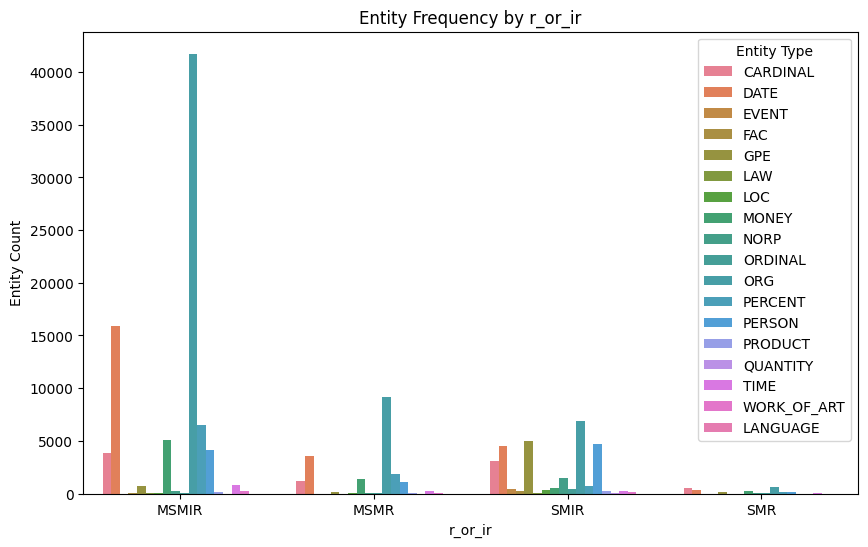

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

entity_counts = (
    balanced_df_24k.explode('entities')
    .groupby(['r_or_ir', 'entities'])
    .size()
    .reset_index(name='count')
)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=entity_counts, x='r_or_ir', y='count', hue='entities')
plt.title('Entity Frequency by r_or_ir')
plt.xlabel('r_or_ir')
plt.ylabel('Entity Count')
plt.legend(title='Entity Type')
plt.show()

#### Latent Dirichlet Allocation (LDA)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert text to bag-of-words representation
vectorizer = CountVectorizer(max_features=10000, stop_words='english')
bow_matrix = vectorizer.fit_transform(balanced_df_24k['content'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
topic_distributions = lda.fit_transform(bow_matrix)

# Add topic probabilities to the DataFrame
for i in range(5):
    balanced_df_24k[f'topic_{i}'] = topic_distributions[:, i]


In [31]:
balanced_df_24k

,article_id,source_name,content,category,full_content,relevant,r_or_ir,r_or_ir_encoded,entities,topic_0,topic_1,topic_2,topic_3,topic_4
12,89563,The Times of India,Ranked! Worlds most loved landmarks; Taj Mahal...,Nepal,NEW DELHI: India preferred Bangladesh over Nep...,0,SMIR,3,"[PERSON, ORG]",0.122611,0.020000,0.020401,0.020557,0.816431
75,89671,The Times of India,"At the crack of dawn every day, hushed frantic...",Nepal,IANS Representative image. At the crack of daw...,0,SMIR,3,[FAC],0.012532,0.013138,0.863832,0.012529,0.097969
76,89672,The Times of India,Offbeat Himachal getaways for Dussehra long we...,Nepal,NEW DELHI: The Bar Council of India (BCI) on W...,0,SMIR,3,[DATE],0.066667,0.066667,0.733332,0.066667,0.066667
126,89758,The Times of India,As the first batch of evacuees from Israel arr...,Nepal,"ANI Nepal: First batch of 254 students, strand...",0,SMIR,3,"[ORDINAL, GPE, GPE, TIME, DATE, ORG, GPE]",0.013406,0.013510,0.879129,0.013381,0.080574
128,89761,The Times of India,Indian dishes that taste better the next day,Nepal,KATHMANDU: Two earthquakes rocked western Nepa...,0,SMIR,3,"[NORP, DATE]",0.040285,0.436150,0.166488,0.317077,0.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105352,780263,ETF Daily News,BRYN MAWR TRUST Co trimmed its holdings in TE ...,Africa,BRYN MAWR TRUST Co trimmed its holdings in TE ...,0,MSMIR,1,"[ORG, ORG, ORG, ORG, PERCENT, DATE]",0.959658,0.010062,0.010028,0.010178,0.010073
105353,780280,ETF Daily News,AngloGold Ashanti plc (NYSE:AU – Get Free Repo...,Africa,AngloGold Ashanti plc (NYSE:AU–Get Free Report...,0,MSMIR,1,"[ORG, ORG, PERCENT, DATE, MONEY, MONEY, CARDIN...",0.007778,0.968675,0.007721,0.007903,0.007923
105357,780725,The Times of India,"Malaga, Nov 29, 2023 -Google opened its larges...",Europe,"Reuters Malaga, Nov 29, 2023 -Google opened it...",0,SMIR,3,"[DATE, LOC, DATE]",0.010710,0.211928,0.756058,0.010643,0.010660
105359,780848,ETF Daily News,Pharming Group (NASDAQ:PHAR – Get Free Report)...,Europe,Pharming Group (NASDAQ:PHAR–Get Free Report)’s...,0,MSMIR,1,"[ORG, DATE, MONEY, MONEY, ORG]",0.008481,0.965779,0.008422,0.008409,0.008909


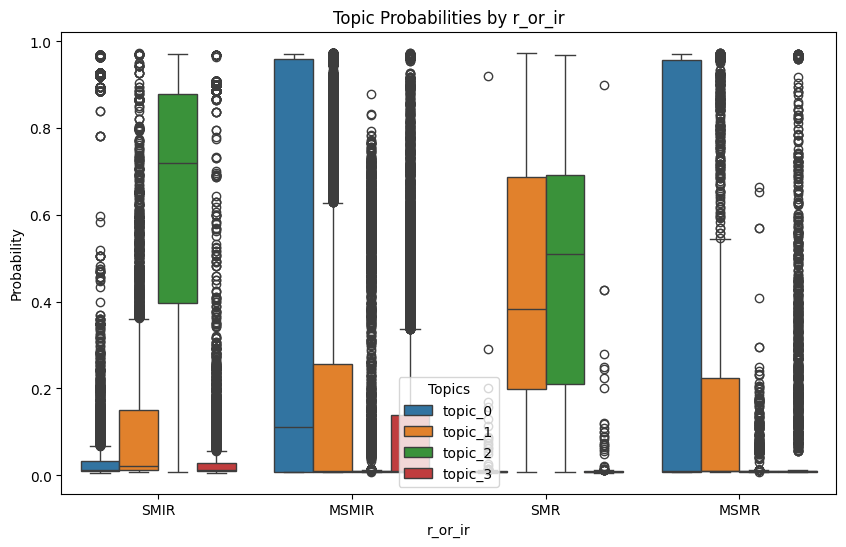

In [46]:
topic_cols = ['topic_0', 'topic_1', 'topic_2', 'topic_3']
df_melted = balanced_df_24k.melt(id_vars='r_or_ir', value_vars=topic_cols, var_name='topic', value_name='probability')

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='r_or_ir', y='probability', hue='topic')
plt.title('Topic Probabilities by r_or_ir')
plt.xlabel('r_or_ir')
plt.ylabel('Probability')
plt.legend(title='Topics')
plt.show()

#### Rapid Automatic Keyword Extraction (RAKE) 

In [33]:
%pip install rake_nltk


  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)


In [35]:
from rake_nltk import Rake
import nltk

nltk.download('stopwords')

rake = Rake()
balanced_df_24k['keywords'] = balanced_df_24k['content'].apply(lambda x: rake.extract_keywords_from_text(x) or rake.get_ranked_phrases())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ianwa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [38]:
balanced_df_24k

,article_id,source_name,content,category,full_content,relevant,r_or_ir,r_or_ir_encoded,entities,topic_0,topic_1,topic_2,topic_3,topic_4,keywords
12,89563,The Times of India,Ranked! Worlds most loved landmarks; Taj Mahal...,Nepal,NEW DELHI: India preferred Bangladesh over Nep...,0,SMIR,3,"[PERSON, ORG]",0.122611,0.020000,0.020401,0.020557,0.816431,"[taj mahal secures 2nd spot, loved landmarks, ..."
75,89671,The Times of India,"At the crack of dawn every day, hushed frantic...",Nepal,IANS Representative image. At the crack of daw...,0,SMIR,3,[FAC],0.012532,0.013138,0.863832,0.012529,0.097969,"[ne … [+ 3623 chars, hushed frantic activity b..."
76,89672,The Times of India,Offbeat Himachal getaways for Dussehra long we...,Nepal,NEW DELHI: The Bar Council of India (BCI) on W...,0,SMIR,3,[DATE],0.066667,0.066667,0.733332,0.066667,0.066667,"[offbeat himachal getaways, dussehra long week..."
126,89758,The Times of India,As the first batch of evacuees from Israel arr...,Nepal,"ANI Nepal: First batch of 254 students, strand...",0,SMIR,3,"[ORDINAL, GPE, GPE, TIME, DATE, ORG, GPE]",0.013406,0.013510,0.879129,0.013381,0.080574,"[israel .… [+ 3840 chars, israel arrived back,..."
128,89761,The Times of India,Indian dishes that taste better the next day,Nepal,KATHMANDU: Two earthquakes rocked western Nepa...,0,SMIR,3,"[NORP, DATE]",0.040285,0.436150,0.166488,0.317077,0.040000,"[taste better, next day, indian dishes]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105352,780263,ETF Daily News,BRYN MAWR TRUST Co trimmed its holdings in TE ...,Africa,BRYN MAWR TRUST Co trimmed its holdings in TE ...,0,MSMIR,1,"[ORG, ORG, ORG, ORG, PERCENT, DATE]",0.959658,0.010062,0.010028,0.010178,0.010073,"[securities … [+ 4578 chars, bryn mawr trust c..."
105353,780280,ETF Daily News,AngloGold Ashanti plc (NYSE:AU – Get Free Repo...,Africa,AngloGold Ashanti plc (NYSE:AU–Get Free Report...,0,MSMIR,1,"[ORG, ORG, PERCENT, DATE, MONEY, MONEY, CARDIN...",0.007778,0.968675,0.007721,0.007903,0.007923,"[au – get free report, … [+ 4246 chars, 655 sh..."
105357,780725,The Times of India,"Malaga, Nov 29, 2023 -Google opened its larges...",Europe,"Reuters Malaga, Nov 29, 2023 -Google opened it...",0,SMIR,3,"[DATE, LOC, DATE]",0.010710,0.211928,0.756058,0.010643,0.010660,"[si … [+ 1788 chars, risked disrupting politic..."
105359,780848,ETF Daily News,Pharming Group (NASDAQ:PHAR – Get Free Report)...,Europe,Pharming Group (NASDAQ:PHAR–Get Free Report)’s...,0,MSMIR,1,"[ORG, DATE, MONEY, MONEY, ORG]",0.008481,0.965779,0.008422,0.008409,0.008909,"[pharming group shares la … [+ 2374 chars, pha..."


In [48]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


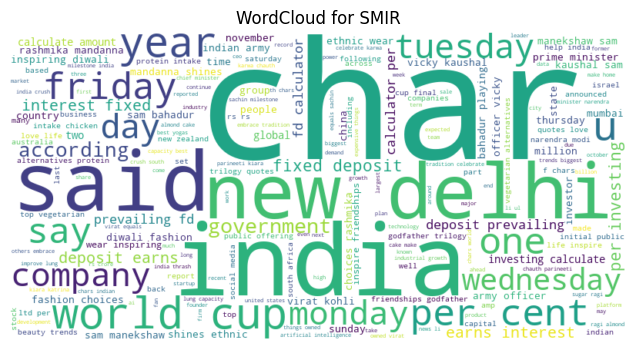

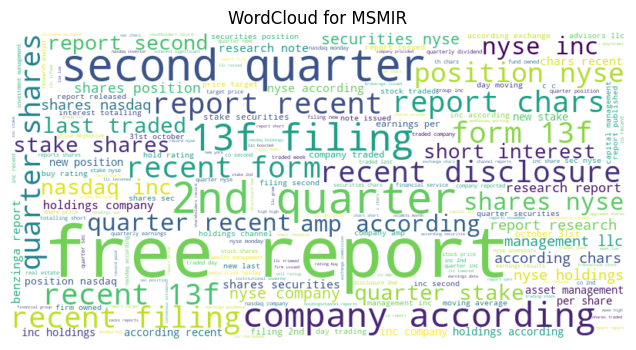

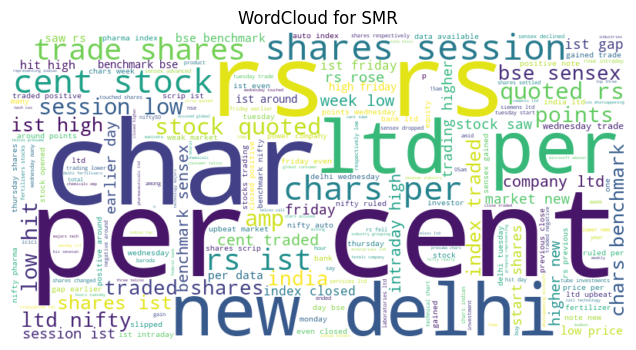

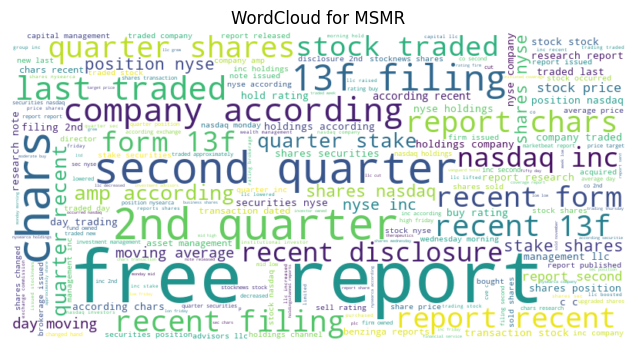

In [49]:
from wordcloud import WordCloud

for category in balanced_df_24k['r_or_ir'].unique():
    keywords = balanced_df_24k[balanced_df_24k['r_or_ir'] == category]['keywords'].explode().dropna()
    text = ' '.join(keywords)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud for {category}')
    plt.show()

### Testing out SMOTE (using balanced_df_24k)

In [ ]:
%pip install imblearn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch
from torch.utils.data import Dataset
import re





#### Random Forest classifier

In [19]:
# Step 5: Encoding Strategies
# TF-IDF Vectorizer for classical models
X_train_tfidf = X_train
X_val_tfidf = X_val
X_test_tfidf = X_test

# Step 6: Baseline Model (Random Forest)
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       210
           1       0.91      0.95      0.93       210

    accuracy                           0.93       420
   macro avg       0.93      0.93      0.93       420
weighted avg       0.93      0.93      0.93       420



### Classifier

In [60]:
import torch
import torch.nn as nn
from sentence_transformers import SentenceTransformer

class SentenceBertClassifier(nn.Module):
    def __init__(self, model_name='all-MiniLM-L6-v2', num_classes=2):
        super(SentenceBertClassifier, self).__init__()
        self.model = SentenceTransformer(model_name)  # Pre-trained Sentence-BERT model
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(self.model.get_sentence_embedding_dimension(), num_classes)  # Classification layer

    def forward(self, texts):
        embeddings = self.model.encode(texts, convert_to_tensor=True)  # Create embeddings
        embeddings = self.dropout(embeddings)
        return self.fc(embeddings)

### Modelling with different pipelines
- Naive Bayes
- Logistic Regression
- Random Forest
- Extra Trees
- Gradient Boosting
- XGBoost 
- SVM (Support Vector Machine)

In [56]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# sklearn imports 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import XGBoost Classifier
from xgboost import XGBClassifier

# Import pickle to save models
import pickle


# Define pipelines
# Naive Bayes Pipeline
pipe_nb = Pipeline([
    ('tfidf', CountVectorizer()), # CountVectorizer performed better than TfidfVectorizer (different than other models)
    ('clf', MultinomialNB())
])

# Logistic Regression Pipeline
pipe_lr = Pipeline([
    ('tfidf', TfidfVectorizer()), # TfidfVectorizer performed better than CountVectorizer
    ('clf', LogisticRegression())
])

# Random Forest Pipeline
pipe_rf = Pipeline([
    ('tfidf', TfidfVectorizer()), # TfidfVectorizer performed better than CountVectorizer
    ('clf', RandomForestClassifier())
])

# Extra Trees Pipeline
pipe_et = Pipeline([
    ('tfidf', TfidfVectorizer()), # TfidfVectorizer performed better than CountVectorizer
    ('clf', ExtraTreesClassifier())
])

# Gradient Boosting Pipeline
pipe_gb = Pipeline([
    ('tfidf', TfidfVectorizer()), # TfidfVectorizer performed better than CountVectorizer
    ('clf', GradientBoostingClassifier())
])

# XGBoost Pipeline
pipe_xg = Pipeline([
    ('tfidf', TfidfVectorizer()), # TfidfVectorizer performed better than CountVectorizer
    ('clf', XGBClassifier()) # (https://xgboost.readthedocs.io/en/stable/python/python_intro.html)
])

# SVM (Support Vector Machine) Pipeline
pipe_svc = Pipeline([
    ('tfidf', TfidfVectorizer()), # TfidfVectorizer performed better than CountVectorizer
    ('clf', SVC(probability=True))
])

# Combine pipelines into a list of pipelines
pipes = [
    # pipe_nb,
    #      pipe_lr,
    #      pipe_rf,
    #      pipe_et,
         pipe_gb,
         pipe_xg,
         pipe_svc]

pipe_names = [
    # 'Naive Bayes',
    #           'Logistic Regression',
    #           'Random Forest',
    #           'Extra Trees',
              'Gradient Boosting',
              'XGBoost',
              'SVM']



# Define hyperparameters for each pipeline to gridsearch over
# Naive Bayes Hyperparameters
hp_nb = {'tfidf__max_df': [0.5], # Tested parameters: [0.5, 0.75, 1.0]
         'tfidf__ngram_range': [(1, 3)], # Tested parameters: [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3), (3, 3)]
         'clf__alpha': [0]} # Tested parameters: [0, 0.01, 0.1, 0.5, 1.0]

# Logistic Regression Hyperparameters
hp_lr = {'tfidf__max_df': [0.5], # Tested parameters: [0.5, 0.75, 1.0]
         'tfidf__ngram_range': [(1, 2)], # Tested parameters: [(1, 1), (1, 2)]
         'clf__penalty': ['l2'], # Tested parameters: ['l1', 'l2']
         'clf__C': [3]} # Tested parameters: np.linspace(0, 10, 11)

# Random Forest Hyperparameters
hp_rf = {'tfidf__max_df': [1.0], # Tested parameters: [0.5, 0.75, 1.0]
         'tfidf__ngram_range': [(1, 1)], # Tested parameters: [(1, 1), (1, 2)]
         'clf__n_estimators': [400], # Tested parameters: [200, 300, 400, 1000, 2000, 3000]
         'clf__max_depth': [25]} # Tested parameters: [5, 7, 10, 12, 15, 18, 22, 25]

# Extra Trees Hyperparameters
hp_et = {'tfidf__max_df': [0.75], # Tested parameters: [0.5, 0.75, 1.0]
         'tfidf__ngram_range': [(1, 2)], # Tested parameters: [(1, 1), (1, 2)]
         'clf__n_estimators': [1000], # Tested parameters: [200, 300, 400, 500, 1000, 2000, 3000]
         'clf__max_depth': [25]} # Tested parameters: [5, 7, 10, 12, 15, 18, 22, 25]

# Gradient Boosting Hyperparameters
hp_gb = {'tfidf__max_df': [0.5, 0.75, 1.0], # Tested parameters: [0.5, 0.75, 1.0]
         'tfidf__ngram_range': [(1, 1), (1, 2)], # Tested parameters: [(1, 1), (1, 2)]
         'clf__n_estimators': [10, 100, 300, 500], # Tested parameters: [10, 100, 300, 500, 1000]
         'clf__max_depth': [None, 1, 2, 3, 4, 5, 10], # Tested parameters: [None, 1, 2, 3, 4, 5, 10, 18]
         'clf__learning_rate': [0.01, 0.1, 1, 10]} # Tested parameters: [0.01, 0.1, 1, 10]

# XGBoost Hyperparameters
hp_xg = {'tfidf__max_df': [0.5, 0.75, 1.0], # Tested parameters: [0.5, 0.75, 1.0]
         'tfidf__ngram_range':  [(1, 1), (1, 2)], # Tested parameters: [(1, 1), (1, 2)]
         'clf__n_estimators': [10, 100, 500, 1000], # Tested parameters: [10, 100, 500, 1000]
         'clf__max_depth': [1, 2, 3, 5, 7, 12, 18], # Tested parameters: [1, 2, 3, 5, 7, 12, 18]
         'clf__learning_rate': [0.1, 1, 10]} # Tested parameters: [0.1, 1, 10]

# SVM (Support Vector Machine) Hyperparameters
hp_svc = {'tfidf__max_df': [0.5, 0.75, 1.0], # Tested parameters: [0.5, 0.75, 1.0]
         'tfidf__ngram_range': [(1, 1), (1, 2)], # Tested parameters: [(1, 1), (1, 2)]
         'clf__C': [1], # Tested parameters: np.logspace(-3, 1, 10)
         'clf__kernel': ['rbf', 'poly']} # Tested parameters: ['rbf', 'poly']

# Combine hyperparameters into a list of hyperparameters
hps = [hp_gb,
       hp_xg,
       hp_svc]

X_train = train_df['content']
y_train = train_df['relevant']

X_test = test_df['content']
y_test = test_df['relevant']

In [57]:
%%time
# Fit and evaluate pipelines using GridSearchCV

cms = [] # initialize list of confusion matricies

# Loop over each pipeline to gridsearch, fit, evaluate, and save the model
for pipe, name, pgrid in zip(pipes, pipe_names, hps):
    # Gridsearch to find the best model
    gs = GridSearchCV(estimator=pipe, param_grid=pgrid, cv=5, n_jobs=6)
    
    # Fit the best model
    gs.fit(X_train, y_train)
    
    # Save the best model to disk
    filename = f"{name}.pkl"
    pickle.dump(gs, open(f"./models/individual/{filename}", 'wb'))
    
    # Make predictions (for metrics)
    y_pred = gs.predict(X_test)
    
    # Append to list of confusion matricies for later plotting
    cms.append(confusion_matrix(y_test, y_pred))
    
    # Print performance metrics
    print(f" {name} ".center(26, "="))
    print(f"Test Accuracy: {round(gs.score(X_test, y_test), 3)}")
    print(f"Train Accuracy: {round(gs.score(X_train, y_train), 3)}")
    print(f"Precision: {round(precision_score(y_test, y_pred), 3)}")
    print(f"Recall: {round(recall_score(y_test, y_pred), 3)}")
    print(f"F1 Score: {round(f1_score(y_test, y_pred), 3)}")
    print(f"Best parameters: {gs.best_params_}") # best parameters
    print()

KeyboardInterrupt: 

### Testing Various Classifiers, with a) TFIDF Vectorizer b) Univ Sentence Encoder (USE) c) Both
1. Linear SVM
2. Logistic Regression (LR)
3. Naive Bayes
4. XGBoost
5. Random Forest

#### Initialization

In [105]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from timeit import default_timer as timer

svm_classifier = LinearSVC()
logistic_regression = LogisticRegression(max_iter=1000)
nb_classifier = MultinomialNB()
xgboost_classifier = XGBClassifier()
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, max_features='sqrt', min_samples_leaf=4, bootstrap=True, n_jobs=-1, random_state=0)

def evaluate_model(model, xtest, ytest):
    # Make predictions using the model
    y_pred = model.predict(xtest)

    # Calculate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    # Calculate precision
    precision = precision_score(ytest, y_pred)
    # Calculate recall
    recall = recall_score(ytest, y_pred)
    # Calculate f1 score
    f1 = f1_score(ytest, y_pred)
    # Generate a classification report and confusion matrix
    report = classification_report(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    return y_pred, accuracy, precision, recall, f1, report, cm


# Define batch size
batch_size = 1000

#### 1. TFIDF

In [107]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

start = timer()
tfidf_vectorizer_xtrain = []
for i in range(0, len(X_train), batch_size):
    batch_X_train = X_train[i:i + batch_size]
    batch_X_train_tfidf = tfidf_vectorizer.fit_transform(batch_X_train)
    tfidf_vectorizer_xtrain.extend(batch_X_train_tfidf.toarray())
print('Required time for embedding TFIDF with train data:- ', timer() - start) 


NameError: name 'TfidfVectorizer' is not defined

##### Test data

In [132]:
start = timer()
tfidf_vectorizer_xtest = []
for i in range(0, len(X_test), batch_size):
    batch_X_test = X_test[i:i + batch_size]
    batch_X_test_tfidf = tfidf_vectorizer.transform(batch_X_test)
    tfidf_vectorizer_xtest.extend(batch_X_test_tfidf.toarray())
print('Required time for embedding TFIDF with train data:- ', timer() - start) 

Required time for embedding TFIDF with train data:-  0.13175189995672554


In [133]:
start = timer()
svm_tfidf = svm_classifier.fit(tfidf_vectorizer_xtrain, y_train)
print('Required time for training Linear SVM classifiers:- ', timer() - start) 
start = timer()
lr_tfidf = logistic_regression.fit(tfidf_vectorizer_xtrain, y_train)
print('Required time for training Logistic Regression classifiers:- ', timer() - start) 
start = timer()
nb_tfidf = nb_classifier.fit(tfidf_vectorizer_xtrain, y_train)
print('Required time for training Naive Bayes classifiers:- ', timer() - start) 
start = timer()
xgboost_tfidf = xgboost_classifier.fit(tfidf_vectorizer_xtrain, y_train)
print('Required time for training XGBoost classifiers:- ', timer() - start) 
start = timer()
rfc_tfidf = random_forest_classifier.fit(tfidf_vectorizer_xtrain, y_train)
print('Required time for training all five classifiers:- ', timer() - start) 

Required time for training Linear SVM classifiers:-  0.0694999000406824
Required time for training Logistic Regression classifiers:-  0.11447510001016781
Required time for training Naive Bayes classifiers:-  0.03881639998871833
Required time for training XGBoost classifiers:-  4.644842999987304
Required time for training all five classifiers:-  0.16235200001392514


##### a. Linear SVM

In [136]:
start = timer()
y_pred_svm, accuracy_svm, precision_svm, recall_svm, f1_svm, report_svm, confusion_matrix_svm = evaluate_model(svm_tfidf, tfidf_vectorizer_xtest, y_test)
print('Required time for SVM prediction:- ', timer() - start) 

Required time for SVM prediction:-  0.015362299978733063


In [140]:
print(f"LinearSVM Accuracy: {accuracy_svm:.2f}")
print(f"LinearSVM Precision: {precision_svm:.2f}")
print(f"LinearSVM Recall: {recall_svm:.2f}")
print(f"LinearSVM F1 score: {f1_svm:.2f}")
print("Classification Report:")
print(report_svm)
print("Confusion Matrix")
print(confusion_matrix_svm)

LinearSVM Accuracy: 0.83
LinearSVM Precision: 0.79
LinearSVM Recall: 0.73
LinearSVM F1 score: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       198
           1       0.79      0.73      0.76       111

    accuracy                           0.83       309
   macro avg       0.82      0.81      0.82       309
weighted avg       0.83      0.83      0.83       309

Confusion Matrix
[[177  21]
 [ 30  81]]


##### b. Logistic Regression

In [141]:
y_pred_lr, accuracy_lr, precision_lr, recall_lr, f1_lr, report_lr, cm_lr = evaluate_model(lr_tfidf, tfidf_vectorizer_xtest, y_test)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"Logistic Regression Precision: {precision_lr:.2f}")
print(f"Logistic Regression Recall: {recall_lr:.2f}")
print(f"Logistic Regression F1 score: {f1_lr:.2f}")
print("Classification Report:")
print(report_lr)
print("Confusion Matrix")
print(cm_lr)

Logistic Regression Accuracy: 0.80
Logistic Regression Precision: 0.77
Logistic Regression Recall: 0.61
Logistic Regression F1 score: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       198
           1       0.77      0.61      0.68       111

    accuracy                           0.80       309
   macro avg       0.79      0.76      0.77       309
weighted avg       0.79      0.80      0.79       309

Confusion Matrix
[[178  20]
 [ 43  68]]


##### c. Naive Bayes

In [143]:
y_pred_nb, accuracy_nb, precision_nb, recall_nb, f1_nb, report_nb, cm_nb = evaluate_model(nb_tfidf, tfidf_vectorizer_xtest, y_test)

print(f"Naive bayes Accuracy: {accuracy_nb:.2f}")
print(f"Naive bayes Precision: {precision_nb:.2f}")
print(f"Naive bayes Recall: {recall_nb:.2f}")
print(f"Naive bayes F1 score: {f1_nb:.2f}")
print("Classification Report:")
print(report_nb)
print("Confusion Matrix:")
print(cm_nb)


Naive bayes Accuracy: 0.78
Naive bayes Precision: 0.71
Naive bayes Recall: 0.68
Naive bayes F1 score: 0.69
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       198
           1       0.71      0.68      0.69       111

    accuracy                           0.78       309
   macro avg       0.77      0.76      0.76       309
weighted avg       0.78      0.78      0.78       309

Confusion Matrix:
[[167  31]
 [ 36  75]]


##### d. XGBoost

In [144]:
y_pred_xgboost, accuracy_xgboost, precision_xgboost, recall_xgboost, f1_xgboost, report_xgboost, cm_xgboost = evaluate_model(xgboost_tfidf, tfidf_vectorizer_xtest, y_test)

print(f"XGBoost Accuracy: {accuracy_xgboost:.2f}")
print(f"XGBoost Precision: {precision_xgboost:.2f}")
print(f"XGBoost Recall: {recall_xgboost:.2f}")
print(f"XGBoost F1 score: {f1_xgboost:.2f}")
print("Classification Report:")
print(report_xgboost)
print("Confusion Matrix:")
print(cm_xgboost)

XGBoost Accuracy: 0.90
XGBoost Precision: 0.85
XGBoost Recall: 0.88
XGBoost F1 score: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       198
           1       0.85      0.88      0.87       111

    accuracy                           0.90       309
   macro avg       0.89      0.90      0.90       309
weighted avg       0.90      0.90      0.90       309

Confusion Matrix:
[[181  17]
 [ 13  98]]


##### e. Random Forest

In [146]:
y_pred_rfc, accuracy_rfc, precision_rfc, recall_rfc, f1_rfc, report_rfc, cm_rfc = evaluate_model(rfc_tfidf, tfidf_vectorizer_xtest, y_test)

print(f"Random Forest Accuracy: {accuracy_rfc:.2f}")
print(f"Random Forest Precision: {precision_rfc:.2f}")
print(f"Random Forest Recall: {recall_rfc:.2f}")
print(f"Random Forest F1 score: {f1_rfc:.2f}")
print("Classification Report:")
print(report_rfc)
print("Confusion Matrix:")
print(cm_rfc)

Random Forest Accuracy: 0.72
Random Forest Precision: 0.88
Random Forest Recall: 0.26
Random Forest F1 score: 0.40
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.98      0.82       198
           1       0.88      0.26      0.40       111

    accuracy                           0.72       309
   macro avg       0.79      0.62      0.61       309
weighted avg       0.77      0.72      0.67       309

Confusion Matrix:
[[194   4]
 [ 82  29]]


##### Graphs

In [149]:
%pip install matplotlib


  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------------------- -------- 6.3/8.0 MB 32.2 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 29.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 41.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


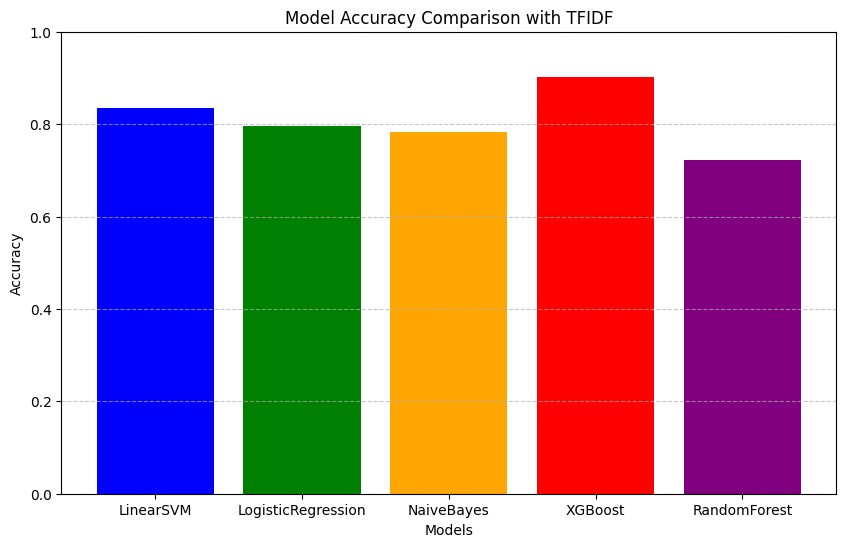

In [150]:
import matplotlib.pyplot as plt

model_names = ['LinearSVM', 'LogisticRegression', 'NaiveBayes', 'XGBoost', 'RandomForest']
model_accuracies = [accuracy_svm, accuracy_lr, accuracy_nb, accuracy_xgboost, accuracy_rfc]

plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison with TFIDF")
plt.ylim(0.0, 1.0)  # Set the y-axis limits
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 2. Universal Sentence Encoder

In [ ]:
%pip install tensorflow_hub

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from timeit import default_timer as timer

svm_classifier = LinearSVC()
logistic_regression = LogisticRegression(max_iter=1000)
nb_classifier = MultinomialNB()
xgboost_classifier = XGBClassifier()

def evaluate_model(model, xtest, ytest):
    # Make predictions using the model
    y_pred = model.predict(xtest)

    # Calculate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    # Calculate precision
    precision = precision_score(ytest, y_pred)
    # Calculate recall
    recall = recall_score(ytest, y_pred)
    # Calculate f1 score
    f1 = f1_score(ytest, y_pred)
    # Generate a classification report and confusion matrix
    report = classification_report(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    return y_pred, accuracy, precision, recall, f1, report, cm

batch_size = 1000


##### Testing out Linear SVM, Logistic Regression, XGBoost (with y = 'relevant')

In [149]:
import tensorflow_hub as hub

# X = train_df['full_content']
# y = train_df['relevant']
# xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
xtrain = train_df['content']
xtest = test_df['content']

ytrain = train_df['relevant']
ytest = test_df['relevant']


embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

xtrain_use = []
xtest_use = []

for i in range(0, len(xtrain), batch_size):
    batch_X_train = xtrain[i:i + batch_size]
    batch_X_train_use = np.array(embed(batch_X_train))
    xtrain_use.extend(batch_X_train_use)

for i in range(0, len(xtest), batch_size):
    batch_X_test = xtest[i:i + batch_size]
    batch_X_test_use = np.array(embed(batch_X_test))
    xtest_use.extend(batch_X_test_use)

start = timer()
svm_use = svm_classifier.fit(xtrain_use, ytrain)
print('Required time for training Linear SVM classifier:- ', timer() - start) 
start = timer()
lr_use = logistic_regression.fit(xtrain_use, ytrain)
print('Required time for training Logistic Regression:- ', timer() - start)  
start = timer()
xgboost_use = xgboost_classifier.fit(xtrain_use, ytrain)
print('Required time for training XGBoost classifier:- ', timer() - start) 
start = timer()
rfc_use = random_forest_classifier.fit(xtrain_use, ytrain)
print('Required time for training all Random Forest classifier:- ', timer() - start) 

# Linear SVM
y_pred_svm_use, accuracy_svm_use, precision_svm_use, recall_svm_use, f1_svm_use, report_svm_use, cm_svm_use = evaluate_model(svm_use, xtest_use, ytest)
print(f"LinearSVM (USE) Accuracy: {accuracy_svm_use:.2f}")
print(f"LinearSVM (USE) Precision: {precision_svm_use:.2f}")
print(f"LinearSVM (USE) Recall: {recall_svm_use:.2f}")
print(f"LinearSVM (USE) F1 score: {f1_svm_use:.2f}")
print("Classification Report:")
print(report_svm_use)
print("Confusion Matrix")
print(cm_svm_use)

# Logistic regression
y_pred_lr_use, accuracy_lr_use, precision_lr_use, recall_lr_use, f1_lr_use, report_lr_use, cm_lr_use = evaluate_model(lr_use, xtest_use, ytest)
print(f"Logistic Regression (USE) Accuracy: {accuracy_lr_use:.2f}")
print(f"Logistic Regression (USE) Precision: {precision_lr_use:.2f}")
print(f"Logistic Regression (USE) Recall: {recall_lr_use:.2f}")
print(f"Logistic Regression (USE) F1 score: {f1_lr_use:.2f}")
print("Classification Report:")
print(report_lr_use)
print("Confusion Matrix")
print(cm_lr_use)

# XGBoost 
y_pred_xgboost_use, accuracy_xgboost_use, precision_xgboost_use, recall_xgboost_use, f1_xgboost_use, report_xgboost_use, cm_xgboost_use = evaluate_model(xgboost_use, xtest_use, ytest)
print(f"XGBoost (USE) Accuracy: {accuracy_xgboost_use:.2f}")
print(f"XGBoost (USE) Precision: {precision_xgboost_use:.2f}")
print(f"XGBoost (USE) Recall: {recall_xgboost_use:.2f}")
print(f"XGBoost (USE) F1 score: {f1_xgboost_use:.2f}")
print("Classification Report:")
print(report_xgboost_use)
print("Confusion Matrix:")
print(cm_xgboost_use)



Required time for training Linear SVM classifier:-  1.5724191999761388
Required time for training Logistic Regression:-  0.20765180001035333
Required time for training XGBoost classifier:-  4.669218999915756
Required time for training all Random Forest classifier:-  0.7484826999716461
LinearSVM (USE) Accuracy: 0.86
LinearSVM (USE) Precision: 0.62
LinearSVM (USE) Recall: 0.10
LinearSVM (USE) F1 score: 0.17
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      4158
           1       0.62      0.10      0.17       694

    accuracy                           0.86      4852
   macro avg       0.74      0.54      0.55      4852
weighted avg       0.83      0.86      0.82      4852

Confusion Matrix
[[4116   42]
 [ 626   68]]
Logistic Regression (USE) Accuracy: 0.86
Logistic Regression (USE) Precision: 0.59
Logistic Regression (USE) Recall: 0.09
Logistic Regression (USE) F1 score: 0.16
Classification Report:
           

##### Testing with the highest f1 score model

In [191]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [194]:
import os
import numpy as np
import pandas as pd
import tensorflow_hub as hub
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib  # For saving and loading the model

# Define the folder to save the model
model_folder = "models_saic"
os.makedirs(model_folder, exist_ok=True)
model_path = os.path.join(model_folder, "xgboost_use_model.pkl")

# Function to evaluate the model
def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    report = classification_report(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    return y_pred, accuracy, precision, recall, f1, report, cm

# Load Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Prepare data
X = balanced_df['full_content']
y = balanced_df['relevant']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Batch processing for embedding
batch_size = 1000
xtrain_use = []
xtest_use = []

for i in range(0, len(xtrain), batch_size):
    batch_X_train = xtrain[i:i + batch_size]
    batch_X_train_use = np.array(embed(batch_X_train))
    xtrain_use.extend(batch_X_train_use)

for i in range(0, len(xtest), batch_size):
    batch_X_test = xtest[i:i + batch_size]
    batch_X_test_use = np.array(embed(batch_X_test))
    xtest_use.extend(batch_X_test_use)

# Convert to numpy arrays
xtrain_use = np.array(xtrain_use)
xtest_use = np.array(xtest_use)

# Train XGBoost classifier
xgboost_classifier = XGBClassifier()
xgboost_use = xgboost_classifier.fit(xtrain_use, ytrain)

# Save the trained model
joblib.dump(xgboost_use, model_path)
print(f"Model saved at: {model_path}")

# Evaluate the model
y_pred_xgboost_use, accuracy_xgboost_use, precision_xgboost_use, recall_xgboost_use, f1_xgboost_use, report_xgboost_use, cm_xgboost_use = evaluate_model(xgboost_use, xtest_use, ytest)

print(f"\nXGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgboost_use:.2f}")
print(f"Precision: {precision_xgboost_use:.2f}")
print(f"Recall: {recall_xgboost_use:.2f}")
print(f"F1 Score: {f1_xgboost_use:.2f}")
print("\nClassification Report:\n", report_xgboost_use)
print("\nConfusion Matrix:\n", cm_xgboost_use)




Model saved at: models_saic\xgboost_use_model.pkl

XGBoost Model Evaluation:
Accuracy: 0.82
Precision: 0.78
Recall: 0.60
F1 Score: 0.68

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       283
           1       0.78      0.60      0.68       129

    accuracy                           0.82       412
   macro avg       0.81      0.76      0.78       412
weighted avg       0.82      0.82      0.82       412


Confusion Matrix:
 [[261  22]
 [ 51  78]]
Model loaded successfully.

Sample Text: '
covid covidcovidcovidcovidcovid covid covid covid'
Predicted Label (1 = Relevant, 0 = Irrelevant): 0


In [198]:
# Function to test the model on a sample
def test_sample(sample_text, model_path, embed):
    # Load the saved model
    model = joblib.load(model_path)
    print("Model loaded successfully.")

    # Generate embeddings for the sample text
    sample_embedding = np.array(embed([sample_text]))

    # Predict relevance
    prediction = model.predict(sample_embedding)
    return prediction[0]

# Test on a sample text
sample_text = f"""
The new Covid corruption commissioner has started an investigation into personal protective equipment (PPE) fraud.

Tom Hayhoe's first task will be reviewing the £8.7bn of PPE bought during the pandemic that then had to be written off the government's books.

Mr Hayhoe is also likely to review the previous government's abandoning of attempts to reclaim money from deals worth £674m.

The National Crime Agency is separately investigating possible criminal offences committed in the PPE procurement system.

Chris Wormald to become new civil service head
Who is new Cabinet Secretary Chris Wormald?
UK failed to stockpile crucial protective kit
Chancellor Rachel Reeves has asked him to try to recover the public money lost to fraud and underperforming contracts using his experience in procurement as the former chair of an NHS trust.

A Treasury source said: "The chancellor has been clear that she wants this money - that belongs to the British people, and belongs in our public services like our NHS, schools, and police – back.

"She won’t let fraudsters who sought to profit off the back of a national emergency line their pockets.

"Tom Hayhoe brings a wealth of experience and will leave no stone unturned as a commissioner with free rein to investigate the unacceptable carnival of waste and fraud during the pandemic."

The Department for Health and Social Care (DHSC) lost three-quarters of the £12bn it spent on PPE in the first year of the pandemic, largely due to inflated prices and kit that did not meet requirements.

The civil servant who presided over the DHSC during the pandemic, Sir Chris Wormald, has now been appointed to be the UK's most senior civil servant - the Cabinet Secretary.

One prominent company that was awarded government PPE contracts worth more than £200 million through a so-called "VIP lane" was PPE Medpro, linked to Baroness Michelle Mone.

Her husband has since accused the government of trying to "scapegoat" the couple for its own failures, instead blaming the DHSC and calling for the resignation of its top civil servant, Sir Chris.

Labour had a manifesto commitment to appoint a fixed-term commissioner and use every means possible to recoup public money lost in pandemic-related fraud and from contracts which have not been delivered.

Mr Hayhoe's contract is for one year, supported by a small team within the Treasury, and he will report to Reeves directly.

He will submit a report at the end of his contract with lessons and recommendations for government procurement in the face of future crises.
"""
predicted_label = test_sample(sample_text, model_path, embed)
print(f"\nSample Text: '{sample_text}'")
print(f"Predicted Label (1 = Relevant, 0 = Irrelevant): {predicted_label}")

Model loaded successfully.

Sample Text: '
The new Covid corruption commissioner has started an investigation into personal protective equipment (PPE) fraud.

Tom Hayhoe's first task will be reviewing the £8.7bn of PPE bought during the pandemic that then had to be written off the government's books.

Mr Hayhoe is also likely to review the previous government's abandoning of attempts to reclaim money from deals worth £674m.

The National Crime Agency is separately investigating possible criminal offences committed in the PPE procurement system.

Chris Wormald to become new civil service head
Who is new Cabinet Secretary Chris Wormald?
UK failed to stockpile crucial protective kit
Chancellor Rachel Reeves has asked him to try to recover the public money lost to fraud and underperforming contracts using his experience in procurement as the former chair of an NHS trust.

A Treasury source said: "The chancellor has been clear that she wants this money - that belongs to the British people, 

##### Testing LinearSVM, LogisticRegression and XGBoost (with y = 'r_or_ir_encoded')

In [22]:
import tensorflow_hub as hub
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from timeit import default_timer as timer

svm_classifier = LinearSVC()
logistic_regression = LogisticRegression(max_iter=1000)
nb_classifier = MultinomialNB()
xgboost_classifier = XGBClassifier()

def evaluate_model(model, xtest, ytest):
    # Make predictions using the model
    y_pred = model.predict(xtest)

    # Calculate accuracy
    accuracy = accuracy_score(ytest, y_pred)
    # Calculate precision
    precision = precision_score(ytest, y_pred, average='weighted')  #  'macro', 'micro', or 'weighted'
    recall = recall_score(ytest, y_pred, average='weighted')        #  'macro', 'micro', or 'weighted'
    f1 = f1_score(ytest, y_pred, average='weighted') 
    # Generate a classification report and confusion matrix
    report = classification_report(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    return y_pred, accuracy, precision, recall, f1, report, cm

batch_size = 1000

# X = train_df['full_content']
# y = train_df['relevant']
# xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
xtrain = train_df['content']
xtest = test_df['content']

ytrain = train_df['r_or_ir_encoded']
ytest = test_df['r_or_ir_encoded']


embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

xtrain_use = []
xtest_use = []

for i in range(0, len(xtrain), batch_size):
    batch_X_train = xtrain[i:i + batch_size]
    batch_X_train_use = np.array(embed(batch_X_train))
    xtrain_use.extend(batch_X_train_use)

for i in range(0, len(xtest), batch_size):
    batch_X_test = xtest[i:i + batch_size]
    batch_X_test_use = np.array(embed(batch_X_test))
    xtest_use.extend(batch_X_test_use)

svm_use = svm_classifier.fit(xtrain_use, ytrain)
lr_use = logistic_regression.fit(xtrain_use, ytrain)
xgboost_use = xgboost_classifier.fit(xtrain_use, ytrain)
rfc_use = random_forest_classifier.fit(xtrain_use, ytrain)

# Linear SVM
y_pred_svm_use, accuracy_svm_use, precision_svm_use, recall_svm_use, f1_svm_use, report_svm_use, cm_svm_use = evaluate_model(svm_use, xtest_use, ytest)
print(f"LinearSVM (USE) Accuracy: {accuracy_svm_use:.2f}")
print(f"LinearSVM (USE) Precision: {precision_svm_use:.2f}")
print(f"LinearSVM (USE) Recall: {recall_svm_use:.2f}")
print(f"LinearSVM (USE) F1 score: {f1_svm_use:.2f}")
print("Classification Report:")
print(report_svm_use)
print("Confusion Matrix")
print(cm_svm_use)

# Logistic regression
y_pred_lr_use, accuracy_lr_use, precision_lr_use, recall_lr_use, f1_lr_use, report_lr_use, cm_lr_use = evaluate_model(lr_use, xtest_use, ytest)
print(f"Logistic Regression (USE) Accuracy: {accuracy_lr_use:.2f}")
print(f"Logistic Regression (USE) Precision: {precision_lr_use:.2f}")
print(f"Logistic Regression (USE) Recall: {recall_lr_use:.2f}")
print(f"Logistic Regression (USE) F1 score: {f1_lr_use:.2f}")
print("Classification Report:")
print(report_lr_use)
print("Confusion Matrix")
print(cm_lr_use)

# XGBoost 
y_pred_xgboost_use, accuracy_xgboost_use, precision_xgboost_use, recall_xgboost_use, f1_xgboost_use, report_xgboost_use, cm_xgboost_use = evaluate_model(xgboost_use, xtest_use, ytest)
print(f"XGBoost (USE) Accuracy: {accuracy_xgboost_use:.2f}")
print(f"XGBoost (USE) Precision: {precision_xgboost_use:.2f}")
print(f"XGBoost (USE) Recall: {recall_xgboost_use:.2f}")
print(f"XGBoost (USE) F1 score: {f1_xgboost_use:.2f}")
print("Classification Report:")
print(report_xgboost_use)
print("Confusion Matrix:")
print(cm_xgboost_use)



LinearSVM (USE) Accuracy: 0.86
LinearSVM (USE) Precision: 0.83
LinearSVM (USE) Recall: 0.86
LinearSVM (USE) F1 score: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.10      0.17       633
           1       0.82      0.98      0.90      2727
           2       0.69      0.36      0.47        61
           3       0.97      0.99      0.98      1431

    accuracy                           0.86      4852
   macro avg       0.76      0.61      0.63      4852
weighted avg       0.83      0.86      0.82      4852

Confusion Matrix
[[  61  572    0    0]
 [  45 2678    0    4]
 [   0    1   22   38]
 [   0    3   10 1418]]
Logistic Regression (USE) Accuracy: 0.86
Logistic Regression (USE) Precision: 0.83
Logistic Regression (USE) Recall: 0.86
Logistic Regression (USE) F1 score: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.10      0.17       633
           1  

Highest f1 score:

In [24]:
import os
import numpy as np
import pandas as pd
import tensorflow_hub as hub
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import joblib  # For saving and loading the model

# Define the folder to save the model
model_folder = "models_saic"
os.makedirs(model_folder, exist_ok=True)
model_path = os.path.join(model_folder, "xgboost_use_model_with_4_categories.pkl")

# Function to evaluate the model
def evaluate_model(model, xtest, ytest):
    y_pred = model.predict(xtest)
    accuracy = accuracy_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred, average='weighted')
    recall = recall_score(ytest, y_pred, average='weighted')
    f1 = f1_score(ytest, y_pred, average='weighted')
    report = classification_report(ytest, y_pred)
    cm = confusion_matrix(ytest, y_pred)
    return y_pred, accuracy, precision, recall, f1, report, cm

# Load Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Prepare data
# X = balanced_df_24k['content']
# y = balanced_df_24k['r_or_ir_encoded']
# xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
xtrain = train_df['content']
xtest = test_df['content']
ytrain = train_df['r_or_ir_encoded']
ytest = test_df['r_or_ir_encoded']

# Batch processing for embedding
batch_size = 1000
xtrain_use = []
xtest_use = []

for i in range(0, len(xtrain), batch_size):
    batch_X_train = xtrain[i:i + batch_size]
    batch_X_train_use = np.array(embed(batch_X_train))
    xtrain_use.extend(batch_X_train_use)

for i in range(0, len(xtest), batch_size):
    batch_X_test = xtest[i:i + batch_size]
    batch_X_test_use = np.array(embed(batch_X_test))
    xtest_use.extend(batch_X_test_use)

# Convert to numpy arrays
xtrain_use = np.array(xtrain_use)
xtest_use = np.array(xtest_use)

# Train XGBoost classifier
xgboost_classifier = XGBClassifier()
xgboost_use = xgboost_classifier.fit(xtrain_use, ytrain)

# Save the trained model
joblib.dump(xgboost_use, model_path)
print(f"Model saved at: {model_path}")

# Evaluate the model
y_pred_xgboost_use, accuracy_xgboost_use, precision_xgboost_use, recall_xgboost_use, f1_xgboost_use, report_xgboost_use, cm_xgboost_use = evaluate_model(xgboost_use, xtest_use, ytest)

print(f"\nXGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgboost_use:.2f}")
print(f"Precision: {precision_xgboost_use:.2f}")
print(f"Recall: {recall_xgboost_use:.2f}")
print(f"F1 Score: {f1_xgboost_use:.2f}")
print("\nClassification Report:\n", report_xgboost_use)
print("\nConfusion Matrix:\n", cm_xgboost_use)




Model saved at: models_saic\xgboost_use_model_with_4_categories.pkl

XGBoost Model Evaluation:
Accuracy: 0.88
Precision: 0.87
Recall: 0.88
F1 Score: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.29      0.42       633
           1       0.85      0.98      0.91      2727
           2       0.65      0.28      0.39        61
           3       0.97      0.99      0.98      1431

    accuracy                           0.88      4852
   macro avg       0.81      0.63      0.67      4852
weighted avg       0.87      0.88      0.86      4852


Confusion Matrix:
 [[ 185  448    0    0]
 [  63 2661    0    3]
 [   0    2   17   42]
 [   0    8    9 1414]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, predicted_classes, target_names=["MSMR",
    "MSMIR",
    "SMR",
    "SMIR"])

# Print the classification report
print("Classification Report:\n")
print(report)


# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Dataset")
plt.show()

### Using USE with Neural Network training

In [5]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


# Encode labels
le = LabelEncoder()
balanced_df['relevant'] = le.fit_transform(balanced_df['relevant'])

# Split the data
X = balanced_df['full_content']
y = balanced_df['relevant']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Embed Sentences using Universal Sentence Encoder
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
X_train_embeddings = torch.tensor(np.array(embed(X_train.tolist())), dtype=torch.float32)
X_val_embeddings = torch.tensor(np.array(embed(X_val.tolist())), dtype=torch.float32)
X_test_embeddings = torch.tensor(np.array(embed(X_test.tolist())), dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
y_val = torch.tensor(y_val.values, dtype=torch.long)
y_test = torch.tensor(y_test.values, dtype=torch.long)

# Step 3: Create DataLoader
train_dataset = TensorDataset(X_train_embeddings, y_train)
val_dataset = TensorDataset(X_val_embeddings, y_val)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Step 4: Define Neural Network
class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.softmax(x)

# Initialize the model
input_size = X_train_embeddings.shape[1]
hidden_size = 128
num_classes = len(le.classes_)
model = SimpleNN(input_size, hidden_size, num_classes)

# Step 5: Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Step 6: Train the Model
# num_epochs = 10
# best_val_loss = float('inf')
# model_folder = "models_saic"
# os.makedirs(model_folder, exist_ok=True)
# model_save_path = os.path.join(model_folder, "USE_nn_model.pkl")

# for epoch in range(num_epochs):
#     model.train()
#     train_loss = 0
#     for batch in train_loader:
#         embeddings, labels = batch

#         # Forward pass
#         outputs = model(embeddings)
#         loss = criterion(outputs, labels)

#         # Backward pass and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         train_loss += loss.item()
    
#     # Validation
#     model.eval()
#     val_loss = 0
#     with torch.no_grad():
#         for batch in val_loader:
#             embeddings, labels = batch
#             outputs = model(embeddings)
#             loss = criterion(outputs, labels)
#             val_loss += loss.item()
    
#     # Save the best model
#     if val_loss < best_val_loss:
#         best_val_loss = val_loss
#         torch.save(model.state_dict(), model_save_path)
    
#     print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

# # Step 7: Test the Model
# model.load_state_dict(torch.load(model_save_path))
# model.eval()
# with torch.no_grad():
#     test_outputs = model(X_test_embeddings)
#     test_predictions = torch.argmax(test_outputs, dim=1)
#     accuracy = accuracy_score(y_test, test_predictions)

# print("\nTest Accuracy:", accuracy)
# print("\nClassification Report:\n", classification_report(y_test, test_predictions))


In [6]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import f1_score

# Define a function to train and evaluate the model with given hyperparameters
def train_and_evaluate_nn(hidden_size, learning_rate, batch_size, num_epochs=10):
    # Create DataLoader with specified batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    
    # Define the model
    model = SimpleNN(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    best_val_f1 = 0  # Track the best validation F1 score
    for epoch in range(num_epochs):
        model.train()
        for batch in train_loader:
            embeddings, labels = batch
            outputs = model(embeddings)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Validation
        model.eval()
        all_val_labels = []
        all_val_predictions = []
        with torch.no_grad():
            for batch in val_loader:
                embeddings, labels = batch
                outputs = model(embeddings)
                predictions = torch.argmax(outputs, dim=1)
                all_val_labels.extend(labels.tolist())
                all_val_predictions.extend(predictions.tolist())
        
        # Calculate F1 score
        val_f1 = f1_score(all_val_labels, all_val_predictions, average='weighted')
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1  # Update the best F1 score

    return best_val_f1

# Define the parameter grid
param_grid = {
    'hidden_size': [64, 128, 256],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 64],
    'num_epochs': [10]
}

# Perform Grid Search
grid = ParameterGrid(param_grid)
best_params = None
best_f1 = 0

for params in grid:
    print(f"Testing parameters: {params}")
    val_f1 = train_and_evaluate_nn(
        hidden_size=params['hidden_size'],
        learning_rate=params['learning_rate'],
        batch_size=params['batch_size'],
        num_epochs=params['num_epochs']
    )
    print(f"Validation F1 Score: {val_f1:.4f}")
    if val_f1 > best_f1:
        best_f1 = val_f1
        best_params = params

print("\nBest Parameters:", best_params)
print("Best F1 Score:", best_f1)

# Train the final model with the best parameters and evaluate on the test set
final_model = SimpleNN(input_size=input_size, hidden_size=best_params['hidden_size'], num_classes=num_classes)
final_optimizer = torch.optim.Adam(final_model.parameters(), lr=best_params['learning_rate'])
final_criterion = nn.CrossEntropyLoss()

train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True)
final_model.train()
for epoch in range(best_params['num_epochs']):
    for batch in train_loader:
        embeddings, labels = batch
        outputs = final_model(embeddings)
        loss = final_criterion(outputs, labels)
        final_optimizer.zero_grad()
        loss.backward()
        final_optimizer.step()

# Evaluate on the test set
final_model.eval()
with torch.no_grad():
    test_outputs = final_model(X_test_embeddings)
    test_predictions = torch.argmax(test_outputs, dim=1)
    test_f1 = f1_score(y_test, test_predictions, average='weighted')

print("\nTest F1 Score with Best Parameters:", test_f1)
print("\nClassification Report:\n", classification_report(y_test, test_predictions))


Testing parameters: {'batch_size': 16, 'hidden_size': 64, 'learning_rate': 0.001, 'num_epochs': 10}
Validation F1 Score: 0.7734
Testing parameters: {'batch_size': 16, 'hidden_size': 64, 'learning_rate': 0.01, 'num_epochs': 10}
Validation F1 Score: 0.7921
Testing parameters: {'batch_size': 16, 'hidden_size': 64, 'learning_rate': 0.1, 'num_epochs': 10}
Validation F1 Score: 0.5910
Testing parameters: {'batch_size': 16, 'hidden_size': 128, 'learning_rate': 0.001, 'num_epochs': 10}
Validation F1 Score: 0.7819
Testing parameters: {'batch_size': 16, 'hidden_size': 128, 'learning_rate': 0.01, 'num_epochs': 10}
Validation F1 Score: 0.7879
Testing parameters: {'batch_size': 16, 'hidden_size': 128, 'learning_rate': 0.1, 'num_epochs': 10}
Validation F1 Score: 0.5910
Testing parameters: {'batch_size': 16, 'hidden_size': 256, 'learning_rate': 0.001, 'num_epochs': 10}
Validation F1 Score: 0.7885
Testing parameters: {'batch_size': 16, 'hidden_size': 256, 'learning_rate': 0.01, 'num_epochs': 10}
Valida

### Testing out weighted training for imbalanced datasets

#### Method 1: Weighted Loss Function

##### setting a new df called balanced_df_weighted

In [151]:
balanced_df_24k

,article_id,source_name,title,description,content,category,full_content,relevant,r_or_ir,r_or_ir_encoded
12,89563,The Times of India,PM Hasina’s war on terror gets daughter India’...,India News: NEW DELHI: India preferred Banglad...,Ranked! Worlds most loved landmarks; Taj Mahal...,Nepal,NEW DELHI: India preferred Bangladesh over Nep...,0,SMIR,3
75,89671,The Times of India,"After export ban, rice smuggling booms along I...",Villagers along the India-Nepal border in Maha...,"At the crack of dawn every day, hushed frantic...",Nepal,IANS Representative image. At the crack of daw...,0,SMIR,3
76,89672,The Times of India,Bar Council moves HC against its ruling on enr...,The Bar Council of India has approached the De...,Offbeat Himachal getaways for Dussehra long we...,Nepal,NEW DELHI: The Bar Council of India (BCI) on W...,0,SMIR,3
126,89758,The Times of India,"Nepal: First batch of 254 students, stranded a...",The Government of Nepal has announced further ...,As the first batch of evacuees from Israel arr...,Nepal,"ANI Nepal: First batch of 254 students, strand...",0,SMIR,3
128,89761,The Times of India,"Twin earthquakes in Nepal injure 17, trigger l...",Two earthquakes with magnitudes of 6.3 and 5.3...,Indian dishes that taste better the next day,Nepal,KATHMANDU: Two earthquakes rocked western Nepa...,0,SMIR,3
...,...,...,...,...,...,...,...,...,...,...
105352,780263,ETF Daily News,"BRYN MAWR TRUST Co Has $668,000 Stake in TE Co...",BRYN MAWR TRUST Co trimmed its holdings in TE ...,BRYN MAWR TRUST Co trimmed its holdings in TE ...,Africa,BRYN MAWR TRUST Co trimmed its holdings in TE ...,0,MSMIR,1
105353,780280,ETF Daily News,AngloGold Ashanti (NYSE:AU) Shares Up 3.8%,AngloGold Ashanti plc (NYSE:AU – Get Free Repo...,AngloGold Ashanti plc (NYSE:AU – Get Free Repo...,Africa,AngloGold Ashanti plc (NYSE:AU–Get Free Report...,0,MSMIR,1
105357,780725,The Times of India,Google opens biggest European cyber centre,Google opened its largest cybersecurity centre...,"Malaga, Nov 29, 2023 -Google opened its larges...",Europe,"Reuters Malaga, Nov 29, 2023 -Google opened it...",0,SMIR,3
105359,780848,ETF Daily News,Pharming Group (NASDAQ:PHAR) Shares Gap Down t...,Pharming Group (NASDAQ:PHAR – Get Free Report)...,Pharming Group (NASDAQ:PHAR – Get Free Report)...,Europe,Pharming Group (NASDAQ:PHAR–Get Free Report)’s...,0,MSMIR,1


In [69]:
filtered_df = df[df['source_name'].isin(['ETF Daily News', 'The Boston Globe'])]
print(filtered_df['source_name'].value_counts())
filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'Real estate' else 0)
# df_cleaned = filtered_df.dropna(subset=['full_content'])
filtered_df['full_content'] = filtered_df['full_content'].fillna(filtered_df['content'])
balanced_df_weighted = filtered_df
balanced_df_weighted

source_name
ETF Daily News      16631
The Boston Globe      477
Name: count, dtype: int64


C:\Users\ianwa\AppData\Local\Temp\ipykernel_440\1580495392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['relevant'] = filtered_df['category'].apply(lambda x: 1 if x == 'Real estate' else 0)
C:\Users\ianwa\AppData\Local\Temp\ipykernel_440\1580495392.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['full_content'] = filtered_df['full_content'].fillna(filtered_df['content'])


,article_id,source_name,title,description,content,category,full_content,relevant
92,89698,The Boston Globe,Indian rescue copters are flying into region w...,Air force helicopters have been able to land t...,"GANGTOK, India (AP) Air force helicopters were...",Nepal,"GANGTOK, India (AP) Air force helicopters were...",0
161,89801,The Boston Globe,Icy floodwaters burst through major dam in Ind...,The flood began shortly after midnight Wednesd...,A report compiled by the Sikkim State Disaster...,Nepal,A report compiled by the Sikkim State Disaster...,0
162,89802,The Boston Globe,Deaths rise to 47 after an icy flood swept thr...,The flood began shortly after midnight Wednesd...,"GANGTOK, India Rescuers found more bodies over...",Nepal,"GANGTOK, India Rescuers found more bodies over...",0
535,90316,The Boston Globe,Revolution defender DeJuan Jones named to US m...,Jones and the US will play Germany on Oct. 14 ...,New England Revolution defender DeJuan Jones w...,Oman,New England Revolution defender DeJuan Jones w...,0
663,90580,The Boston Globe,"It took nine playoff holes, but Celine Boutier...",The nine-hole playoff tied the record for the ...,In fading light and with another thunderstorm ...,Oman,In fading light and with another thunderstorm ...,0
...,...,...,...,...,...,...,...,...
105351,780252,ETF Daily News,State Board of Administration of Florida Retir...,State Board of Administration of Florida Retir...,State Board of Administration of Florida Retir...,Africa,State Board of Administration of Florida Retir...,0
105352,780263,ETF Daily News,"BRYN MAWR TRUST Co Has $668,000 Stake in TE Co...",BRYN MAWR TRUST Co trimmed its holdings in TE ...,BRYN MAWR TRUST Co trimmed its holdings in TE ...,Africa,BRYN MAWR TRUST Co trimmed its holdings in TE ...,0
105353,780280,ETF Daily News,AngloGold Ashanti (NYSE:AU) Shares Up 3.8%,AngloGold Ashanti plc (NYSE:AU – Get Free Repo...,AngloGold Ashanti plc (NYSE:AU – Get Free Repo...,Africa,AngloGold Ashanti plc (NYSE:AU–Get Free Report...,0
105359,780848,ETF Daily News,Pharming Group (NASDAQ:PHAR) Shares Gap Down t...,Pharming Group (NASDAQ:PHAR – Get Free Report)...,Pharming Group (NASDAQ:PHAR – Get Free Report)...,Europe,Pharming Group (NASDAQ:PHAR–Get Free Report)’s...,0


In [152]:
balanced_df_24k['relevant'].value_counts()

relevant
0    20757
1     3503
Name: count, dtype: int64

##### Use Focal Loss with Universal Sentence Encoder (to test out w setting y as r_or_ir_embedding instead of "relevant")
[Focal Loss Docs](https://github.com/itakurah/Focal-loss-PyTorch)

In [22]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from torch.optim.lr_scheduler import StepLR
import tensorflow_hub as hub
from torch.utils.data import DataLoader, TensorDataset
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn



# Load Universal Sentence Encoder
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

X = train_df['content']
X_list = X.tolist()
X_embeddings = np.array(use_model(X_list).numpy())
X_embeddings_list = X_embeddings.tolist()

# Add embeddings as a new column
train_df['embeddings'] = X_embeddings_list

# Encode text data using USE
# X = np.array([use_model(text).numpy().flatten() for text in balanced_df_24k['content']])
y = train_df['relevant'].values

# Define PyTorch Dataset and DataLoader
dataset = TensorDataset(torch.tensor(X_embeddings, dtype=torch.float32),
                        torch.tensor(y, dtype=torch.long))
train_loader = DataLoader(dataset, batch_size=64, shuffle=True)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

# Model Definition
class Classifier(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_size, 2)  # Binary classification

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Model Initialization
input_size = X_embeddings.shape[1]
hidden_size = 128
model = Classifier(input_size, hidden_size)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Focal Loss Definition
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, inputs, targets):
        BCE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
        pt = torch.exp(-BCE_loss)  # Probability of the true class
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return torch.mean(F_loss)

# Replace criterion with Focal Loss
criterion = FocalLoss(alpha=1, gamma=2)



# Training Loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        X_batch, y_batch = batch

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}")

# Create the directory if it doesn't exist
output_dir = "models_saic"
os.makedirs(output_dir, exist_ok=True)

# Save the model
model_path = os.path.join(output_dir, "weighted_classifier_model_with_focalLoss.pth")
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

# Load the model
loaded_model = Classifier(input_size, hidden_size)
loaded_model.load_state_dict(torch.load(model_path))
loaded_model.eval()  # Set the model to evaluation mode
print("Model loaded successfully.")


# TESTING PORTION
X_test_text = test_df['content']
X_test_list = X_test_text.tolist()
X_test_embeddings = np.array(use_model(X_test_list).numpy())
# Encode text data using USE
# X_test = np.array([use_model(X_test_embeddings).numpy().flatten() for text in test_df['content']])
y_test = test_df['relevant'].values

# Convert test data to PyTorch tensor
X_test_tensor = torch.tensor(X_test_embeddings, dtype=torch.float32)

# Predict
with torch.no_grad():
    predictions = loaded_model(X_test_tensor)
    predicted_classes = torch.argmax(predictions, dim=1).numpy()


Epoch [1/50], Loss: 22.1711
Epoch [2/50], Loss: 19.6887
Epoch [3/50], Loss: 19.1121
Epoch [4/50], Loss: 18.7705
Epoch [5/50], Loss: 18.4264
Epoch [6/50], Loss: 18.1146
Epoch [7/50], Loss: 17.9908
Epoch [8/50], Loss: 17.7668
Epoch [9/50], Loss: 17.5675
Epoch [10/50], Loss: 17.2869
Epoch [11/50], Loss: 17.1080
Epoch [12/50], Loss: 16.8772
Epoch [13/50], Loss: 16.6789
Epoch [14/50], Loss: 16.4342
Epoch [15/50], Loss: 16.2646
Epoch [16/50], Loss: 15.9532
Epoch [17/50], Loss: 15.6477
Epoch [18/50], Loss: 15.4675
Epoch [19/50], Loss: 15.2448
Epoch [20/50], Loss: 15.0627
Epoch [21/50], Loss: 14.6951
Epoch [22/50], Loss: 14.4440
Epoch [23/50], Loss: 14.1915
Epoch [24/50], Loss: 13.9374
Epoch [25/50], Loss: 13.6382
Epoch [26/50], Loss: 13.5279
Epoch [27/50], Loss: 13.1981
Epoch [28/50], Loss: 12.9125
Epoch [29/50], Loss: 12.4502
Epoch [30/50], Loss: 12.5673
Epoch [31/50], Loss: 12.0204
Epoch [32/50], Loss: 11.9522
Epoch [33/50], Loss: 11.6668
Epoch [34/50], Loss: 11.3940
Epoch [35/50], Loss: 11

C:\Users\ianwa\AppData\Local\Temp\ipykernel_10104\210995910.py:113: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_path))


##### Confusion Matrix Graph

Classification Report:

              precision    recall  f1-score   support

  Irrelevant       0.90      0.96      0.93      4158
    Relevant       0.60      0.37      0.45       694

    accuracy                           0.87      4852
   macro avg       0.75      0.66      0.69      4852
weighted avg       0.86      0.87      0.86      4852



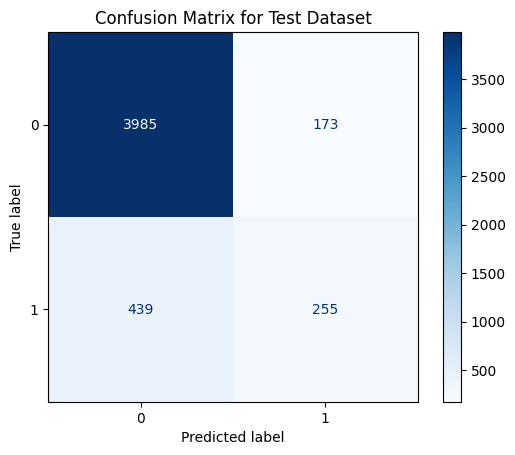

In [85]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, predicted_classes, target_names=["Irrelevant", "Relevant"])

# Print the classification report
print("Classification Report:\n")
print(report)


# Compute confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Dataset")
plt.show()

In [104]:
################################################ OLD METHOD #######################################################
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, dropout):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)  # Dropout with 30% probability
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

num_epochs = 100

# Extract class labels
labels = balanced_df_weighted['r_or_ir_encoded']
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)


# Define the parameters for the model
input_size = X_train_embeddings.shape[1]  # Example size; update with your actual embedding dimension
hidden_size = 256  # Choose based on your desired model complexity
num_classes = 4    # Number of unique classes in the dataset
dropout = 0.3
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=5, gamma=0.5)  # Reduce LR every 5 epochs


# Initialize the SimpleClassifier model and weights
model = SimpleClassifier(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes, dropout=dropout)
model.apply(initialize_weights)


# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        embeddings, labels = batch

        # Forward pass
        outputs = model(embeddings)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        train_loss += loss.item()

    # val loop
    val_loss = 0
    model.eval()
    with torch.no_grad():
        for val_batch in val_loader:
            embeddings, labels = val_batch
            outputs = model(embeddings)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")





Epoch [1/100], Train Loss: 62.2888, Val Loss: 13.8100
Epoch [2/100], Train Loss: 62.2966, Val Loss: 13.8100
Epoch [3/100], Train Loss: 62.2547, Val Loss: 13.8100
Epoch [4/100], Train Loss: 62.2426, Val Loss: 13.8100
Epoch [5/100], Train Loss: 62.2450, Val Loss: 13.8100
Epoch [6/100], Train Loss: 62.1822, Val Loss: 13.8100
Epoch [7/100], Train Loss: 62.3190, Val Loss: 13.8100
Epoch [8/100], Train Loss: 62.2483, Val Loss: 13.8100
Epoch [9/100], Train Loss: 62.2686, Val Loss: 13.8100
Epoch [10/100], Train Loss: 62.2341, Val Loss: 13.8100
Epoch [11/100], Train Loss: 62.2519, Val Loss: 13.8100
Epoch [12/100], Train Loss: 62.3128, Val Loss: 13.8100
Epoch [13/100], Train Loss: 62.3158, Val Loss: 13.8100
Epoch [14/100], Train Loss: 62.2418, Val Loss: 13.8100
Epoch [15/100], Train Loss: 62.1658, Val Loss: 13.8100
Epoch [16/100], Train Loss: 62.3083, Val Loss: 13.8100
Epoch [17/100], Train Loss: 62.3028, Val Loss: 13.8100
Epoch [18/100], Train Loss: 62.2987, Val Loss: 13.8100
Epoch [19/100], Tra

##### GridSearchCV for above code

In [87]:
from sklearn.model_selection import GridSearchCV

from sklearn.base import BaseEstimator, ClassifierMixin

class PyTorchClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_size, hidden_size, num_classes, lr=0.001, epochs=20, dropout=0.3):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_classes = num_classes
        self.lr = lr
        self.epochs = epochs
        self.dropout = dropout
        self.model = None
    
    def fit(self, X, y):
        import torch
        import torch.nn as nn
        from torch.utils.data import DataLoader, TensorDataset
        
        # Convert data to PyTorch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.long)
        
        dataset = TensorDataset(X_tensor, y_tensor)
        loader = DataLoader(dataset, batch_size=32, shuffle=True)
        
        # Define the model
        self.model = SimpleClassifier(self.input_size, self.hidden_size, self.num_classes)
        self.model.apply(initialize_weights)
        
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)
        
        # Train the model
        for epoch in range(self.epochs):
            self.model.train()
            for embeddings, labels in loader:
                outputs = self.model(embeddings)
                loss = criterion(outputs, labels)
                
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        return self
    
    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32)
            outputs = self.model(X_tensor)
            _, preds = torch.max(outputs, 1)
        return preds.numpy()


param_grid = {
    'hidden_size': [64, 128, 256],
    'lr': [0.001, 0.0005, 0.0001],
    'epochs': [10, 20],
    'dropout': [0.3, 0.5],
}

grid = GridSearchCV(PyTorchClassifier(input_size=X_train_embeddings.shape[1], hidden_size=hidden_size, num_classes=4),
                    param_grid, cv=3, scoring='accuracy')
grid.fit(X_train_embeddings, y_train)

print("Best parameters found:", grid.best_params_)
print("Best validation accuracy:", grid.best_score_)


C:\Users\ianwa\AppData\Local\Temp\ipykernel_440\3434277322.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_tensor = torch.tensor(X, dtype=torch.float32)
C:\Users\ianwa\AppData\Local\Temp\ipykernel_440\3434277322.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_tensor = torch.tensor(y, dtype=torch.long)
C:\Users\ianwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ianwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_va

KeyboardInterrupt: 

#### Method 2: Weighted Sampling

In [ ]:
from torch.utils.data import WeightedRandomSampler

# Calculate sample weights
class_sample_count = balanced_df_weighted['relevant'].value_counts()
weights = 1. / class_sample_count[balanced_df_weighted['relevant']].values
sample_weights = torch.tensor(weights, dtype=torch.float32)

# Create a WeightedRandomSampler
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(sample_weights), replacement=True)

# Create a DataLoader with the sampler
train_loader = DataLoader(train_dataset, batch_size=32, sampler=sampler)

# Training loop
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for batch in train_loader:
        embeddings, labels = batch

        # Forward pass
        outputs = model(embeddings)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}")


### Dataset class

In [1]:
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader

sentence_bert_model = SentenceTransformer('all-MiniLM-L6-v2')

batch_size = 64

class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
        # self.texts_embeddings = sentence_bert_model.encode(self.texts, convert_to_tensor=True)


    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text_embedding = sentence_bert_model.encode(self.texts[idx], convert_to_tensor=True)

        return {
            'text': text_embedding,
            'label': self.labels[idx]
        }
    
train_texts, test_texts, train_labels, test_labels = train_test_split(
    balanced_df['full_content'], balanced_df['relevant'], test_size=0.2, random_state=42
)

# Prepare Dataset and DataLoader
train_dataset = TextDataset(train_texts.tolist(), train_labels.tolist())
test_dataset = TextDataset(test_texts.tolist(), test_labels.tolist())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

C:\Users\ianwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NameError: name 'balanced_df' is not defined

### Train and Eval

#### Weighted BERT

In [40]:
balanced_df_24k

,article_id,source_name,content,category,full_content,relevant,r_or_ir,r_or_ir_encoded
12,89563,The Times of India,Ranked! Worlds most loved landmarks; Taj Mahal...,Nepal,NEW DELHI: India preferred Bangladesh over Nep...,0,SMIR,3
75,89671,The Times of India,"At the crack of dawn every day, hushed frantic...",Nepal,IANS Representative image. At the crack of daw...,0,SMIR,3
76,89672,The Times of India,Offbeat Himachal getaways for Dussehra long we...,Nepal,NEW DELHI: The Bar Council of India (BCI) on W...,0,SMIR,3
126,89758,The Times of India,As the first batch of evacuees from Israel arr...,Nepal,"ANI Nepal: First batch of 254 students, strand...",0,SMIR,3
128,89761,The Times of India,Indian dishes that taste better the next day,Nepal,KATHMANDU: Two earthquakes rocked western Nepa...,0,SMIR,3
...,...,...,...,...,...,...,...,...
105352,780263,ETF Daily News,BRYN MAWR TRUST Co trimmed its holdings in TE ...,Africa,BRYN MAWR TRUST Co trimmed its holdings in TE ...,0,MSMIR,1
105353,780280,ETF Daily News,AngloGold Ashanti plc (NYSE:AU – Get Free Repo...,Africa,AngloGold Ashanti plc (NYSE:AU–Get Free Report...,0,MSMIR,1
105357,780725,The Times of India,"Malaga, Nov 29, 2023 -Google opened its larges...",Europe,"Reuters Malaga, Nov 29, 2023 -Google opened it...",0,SMIR,3
105359,780848,ETF Daily News,Pharming Group (NASDAQ:PHAR – Get Free Report)...,Europe,Pharming Group (NASDAQ:PHAR–Get Free Report)’s...,0,MSMIR,1


In [11]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

# Load your dataset
balanced_df_24k['relevant'] = balanced_df_24k['relevant'].astype(int)  # Ensure labels are integers

# Tokenizer and dataset preparation
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class TextDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        row = self.dataframe.iloc[index]
        inputs = self.tokenizer.encode_plus(
            row['content'],  # Replace 'content' with 'article_content'
            None,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt',
        )
        return {
            'input_ids': inputs['input_ids'].squeeze(0),
            'attention_mask': inputs['attention_mask'].squeeze(0),
            'labels': torch.tensor(row['r_or_ir_encoded'], dtype=torch.long),
        }

train_dataset = TextDataset(train_df, tokenizer, max_length=128)
val_dataset = TextDataset(val_df, tokenizer, max_length=128)

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_df['r_or_ir_encoded']), y=train_df['r_or_ir_encoded'])
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(device)

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(train_df['r_or_ir_encoded'].unique()))
model.to(device)

# Loss function and optimizer
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights_tensor)
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training loop
num_epochs = 5
best_val_loss = float('inf')

for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    model.train()
    train_loss = 0
    for batch_idx, batch in enumerate(train_dataloader):
        optimizer.zero_grad()

        inputs = {
            'input_ids': batch['input_ids'].to(device),
            'attention_mask': batch['attention_mask'].to(device),
            'labels': batch['labels'].to(device),
        }

        outputs = model(**inputs)
        loss = outputs.loss
        train_loss += loss.item()

        loss.backward()
        optimizer.step()

        if (batch_idx + 1) % 10 == 0 or batch_idx == len(train_dataloader) - 1:
            print(f"  Batch {batch_idx + 1}/{len(train_dataloader)} - Loss: {loss.item():.4f}")

    train_loss /= len(train_dataloader)
    print(f"Training Loss: {train_loss:.4f}")

    # Validation
    model.eval()
    val_loss = 0
    val_preds, val_labels = [], []
    with torch.no_grad():
        for batch in val_dataloader:
            inputs = {
                'input_ids': batch['input_ids'].to(device),
                'attention_mask': batch['attention_mask'].to(device),
                'labels': batch['labels'].to(device),
            }
            outputs = model(**inputs)
            val_loss += outputs.loss.item()

            logits = outputs.logits
            val_preds.extend(torch.argmax(logits, dim=1).cpu().numpy())
            val_labels.extend(inputs['labels'].cpu().numpy())

    val_loss /= len(val_dataloader)
    print(f"Validation Loss: {val_loss:.4f}")
    print(classification_report(val_labels, val_preds))

    # Save the best model
    if val_loss < best_val_loss:
        print(f"Validation loss improved. Saving model.")
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_bert_model_4_labels.pt")

print("Training complete!")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ianwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5
  Batch 10/910 - Loss: 0.9798
  Batch 20/910 - Loss: 0.7218
  Batch 30/910 - Loss: 0.4402
  Batch 40/910 - Loss: 0.4805
  Batch 50/910 - Loss: 0.3187
  Batch 60/910 - Loss: 0.5779
  Batch 70/910 - Loss: 0.4134
  Batch 80/910 - Loss: 0.3641
  Batch 90/910 - Loss: 0.8146
  Batch 100/910 - Loss: 0.3063
  Batch 110/910 - Loss: 0.3827
  Batch 120/910 - Loss: 0.4601
  Batch 130/910 - Loss: 0.4021
  Batch 140/910 - Loss: 0.3541
  Batch 150/910 - Loss: 0.2955
  Batch 160/910 - Loss: 0.4039
  Batch 170/910 - Loss: 0.2293
  Batch 180/910 - Loss: 0.3110
  Batch 190/910 - Loss: 0.1096
  Batch 200/910 - Loss: 0.6204
  Batch 210/910 - Loss: 0.2614
  Batch 220/910 - Loss: 0.3306
  Batch 230/910 - Loss: 0.5566
  Batch 240/910 - Loss: 0.1894
  Batch 250/910 - Loss: 0.2428
  Batch 260/910 - Loss: 0.1515
  Batch 270/910 - Loss: 0.4769
  Batch 280/910 - Loss: 0.4430
  Batch 290/910 - Loss: 0.3847
  Batch 300/910 - Loss: 0.3575
  Batch 310/910 - Loss: 0.2684
  Batch 320/910 - Loss: 0.3218
  Batch

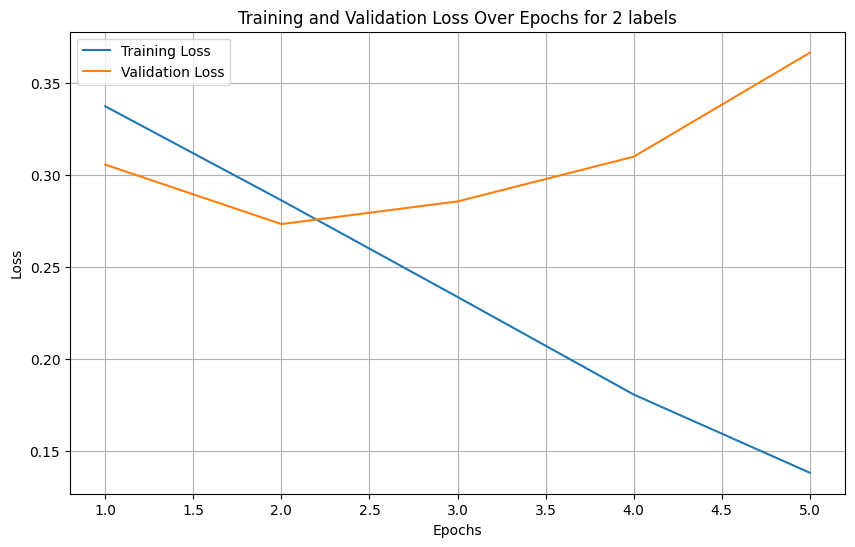

In [13]:
import matplotlib.pyplot as plt

# LOSSES FOR ONLY 2 LABELS (relevant = 1 / relevant = 0)
training_losses = [0.3371, 0.286, 0.2335, 0.1805, 0.138]
validation_losses = [0.3054, 0.2731, 0.2854, 0.3097, 0.3662]

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs for 2 labels')
plt.legend()
plt.grid()
plt.show()

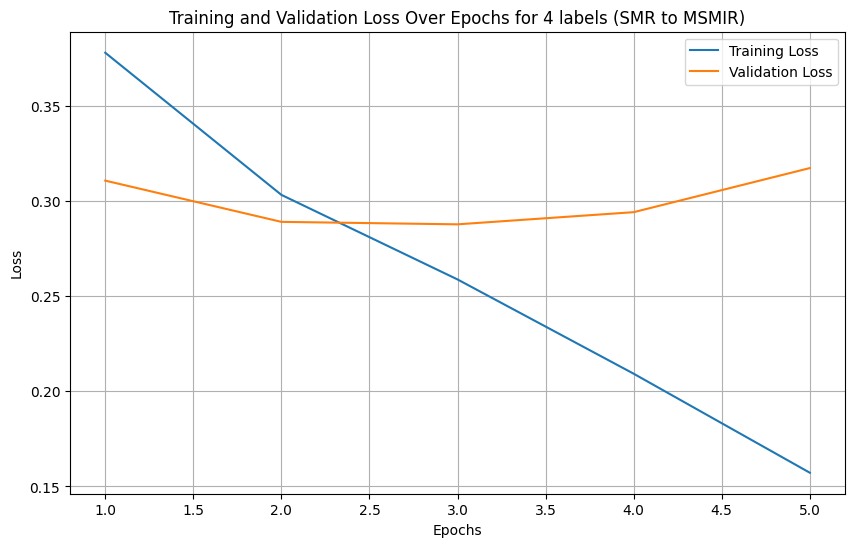

In [14]:
import matplotlib.pyplot as plt

# LOSSES FOR ONLY 2 LABELS (relevant = 1 / relevant = 0)
training_losses = [0.3782, 0.3034, 0.2589, 0.2093, 0.1572]
validation_losses = [0.3109, 0.2892, 0.2879, 0.2943, 0.3175]

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), validation_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs for 4 labels (SMR to MSMIR)')
plt.legend()
plt.grid()
plt.show()

In [15]:
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import classification_report

# Define device
device = torch.device("cpu")

# Load the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(train_df['r_or_ir_encoded'].unique()))
model.load_state_dict(torch.load("best_bert_model_4_labels.pt"))
model.to(device)
model.eval()  # Set the model to evaluation mode

# Custom Dataset for Test Data
class TestDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length):
        self.dataframe = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, index):
        row = self.dataframe.iloc[index]
        inputs = self.tokenizer.encode_plus(
            row['content'],  # Replace 'content' with the column name in test_data
            None,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': inputs['input_ids'].squeeze(0),
            'attention_mask': inputs['attention_mask'].squeeze(0),
            'labels': torch.tensor(row['r_or_ir_encoded'], dtype=torch.long),  # Replace 'relevant' with the label column name
        }

# Prepare Test Dataset and DataLoader
test_dataset = TestDataset(test_df, tokenizer, max_length=128)  # Replace test_data with your test DataFrame
test_dataloader = DataLoader(test_dataset, batch_size=16)

# Perform Inference
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Generate Classification Report
print(classification_report(all_labels, all_preds))


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ianwa\AppData\Local\Temp\ipykernel_10616\2196997704.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.seriali

              precision    recall  f1-score   support

           0       0.61      0.37      0.46       633
           1       0.87      0.94      0.90      2727
           2       0.69      0.36      0.47        61
           3       0.97      0.99      0.98      1431

    accuracy                           0.88      4852
   macro avg       0.78      0.67      0.71      4852
weighted avg       0.86      0.88      0.86      4852



#### RoBERTa

In [ ]:
%pip install torch  --index-url https://download.pytorch.org/whl/cu118


In [2]:
import torch

print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce RTX 4060


In [9]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
from sklearn.utils.class_weight import compute_class_weight
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

# Load data (assuming `train_df` is your training DataFrame)
texts = train_df['content'].tolist()
labels = train_df['relevant'].tolist()

# Train-test split
# train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, random_state=42)
train_texts = train_df['content'].tolist()
val_texts = val_df['content'].tolist()

train_labels = train_df['relevant']
val_labels = val_df['relevant']

# Convert data into HuggingFace Dataset format
train_data = Dataset.from_dict({'text': train_texts, 'label': train_labels})
val_data = Dataset.from_dict({'text': val_texts, 'label': val_labels})

# Tokenization
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize_function(example):
    return tokenizer(example["text"], padding="max_length", truncation=True)

train_data = train_data.map(tokenize_function, batched=True)
val_data = val_data.map(tokenize_function, batched=True)

# Specify the columns for PyTorch model
train_data = train_data.rename_column("label", "labels")
val_data = val_data.rename_column("label", "labels")
train_data.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_data.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Model initialization
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)

# Set class weights
class_weights = torch.tensor([1.0, 5.0]).to("cuda")  # Adjust weights for imbalance
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)


# Define custom trainer with weighted loss
# def compute_loss(model, inputs, return_outputs=False):
#     labels = inputs.pop("labels")
#     outputs = model(**inputs)
#     logits = outputs.logits
#     loss = loss_fn(logits, labels)
#     return (loss, outputs) if return_outputs else loss


C:\Users\ianwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Map: 100%|██████████| 4852/4852 [00:01<00:00, 3004.18 examples/s]
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
print(train_data.features)
print(val_data.features)

{'text': Value(dtype='string', id=None), 'labels': Value(dtype='int64', id=None), 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}
{'text': Value(dtype='string', id=None), 'labels': Value(dtype='int64', id=None), 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}


##### Using Trainer class

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Compute class weights
y = train_df['relevant'].values
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(model.device)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    weight_decay=0.01,
    logging_steps=50,
    remove_unused_columns=False,
    push_to_hub=False,
    fp16=True if torch.cuda.is_available() else False,  
)

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        """
        Compute custom loss with support for additional arguments passed by Trainer.
        """
        labels = inputs.pop("labels")  # Extract the labels
        outputs = model(**inputs)  # Forward pass through the model
        logits = outputs.logits  # Extract logits

        # Weighted Cross-Entropy Loss
        loss_fct = nn.CrossEntropyLoss(weight=class_weights_tensor)  # Use your precomputed class weights
        loss = loss_fct(logits, labels)

        return (loss, outputs) if return_outputs else loss


# Trainer
trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    tokenizer=tokenizer,
)

# Train model
trainer.train()

# Evaluate
predictions = trainer.predict(val_data)


C:\Users\ianwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
C:\Users\ianwa\AppData\Local\Temp\ipykernel_2480\270659748.py:43: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `CustomTrainer.__init__`. Use `processing_class` instead.
  trainer = CustomTrainer(
                                        
  0%|          | 0/4550 [05:49<?, ?it/s]           

{'loss': 0.7314, 'grad_norm': 2.4883368015289307, 'learning_rate': 4.947252747252747e-05, 'epoch': 0.05}


                                        
  0%|          | 0/4550 [08:54<?, ?it/s]            

{'loss': 0.6462, 'grad_norm': 7.093454360961914, 'learning_rate': 4.894505494505495e-05, 'epoch': 0.11}


                                        
  0%|          | 0/4550 [12:23<?, ?it/s]            

{'loss': 0.6887, 'grad_norm': 7.79590368270874, 'learning_rate': 4.83956043956044e-05, 'epoch': 0.16}


                                        
  0%|          | 0/4550 [15:53<?, ?it/s]            

{'loss': 0.6625, 'grad_norm': 5.822249412536621, 'learning_rate': 4.784615384615384e-05, 'epoch': 0.22}


                                        
  0%|          | 0/4550 [19:24<?, ?it/s]            

{'loss': 0.6722, 'grad_norm': 56.45724868774414, 'learning_rate': 4.72967032967033e-05, 'epoch': 0.27}


                                        
  0%|          | 0/4550 [22:55<?, ?it/s]            

{'loss': 0.6967, 'grad_norm': 16.98917007446289, 'learning_rate': 4.674725274725275e-05, 'epoch': 0.33}


                                        
  0%|          | 0/4550 [26:27<?, ?it/s]            

{'loss': 0.6849, 'grad_norm': 4.589706897735596, 'learning_rate': 4.6197802197802196e-05, 'epoch': 0.38}


                                        
  0%|          | 0/4550 [29:56<?, ?it/s]            

{'loss': 0.7168, 'grad_norm': 4.156665325164795, 'learning_rate': 4.564835164835165e-05, 'epoch': 0.44}


                                        
  0%|          | 0/4550 [33:26<?, ?it/s]            

{'loss': 0.6792, 'grad_norm': 5.9053192138671875, 'learning_rate': 4.5098901098901104e-05, 'epoch': 0.49}


                                        
  0%|          | 0/4550 [36:55<?, ?it/s]            

{'loss': 0.6736, 'grad_norm': 4.782864570617676, 'learning_rate': 4.454945054945055e-05, 'epoch': 0.55}


                                        
  0%|          | 0/4550 [40:26<?, ?it/s]            

{'loss': 0.7014, 'grad_norm': 7.793275356292725, 'learning_rate': 4.4000000000000006e-05, 'epoch': 0.6}


                                        
  0%|          | 0/4550 [43:57<?, ?it/s]            

{'loss': 0.6702, 'grad_norm': 2.6695775985717773, 'learning_rate': 4.3450549450549456e-05, 'epoch': 0.66}


                                        
  0%|          | 0/4550 [47:27<?, ?it/s]            

{'loss': 0.6736, 'grad_norm': 1.5938608646392822, 'learning_rate': 4.29010989010989e-05, 'epoch': 0.71}


                                        
  0%|          | 0/4550 [50:57<?, ?it/s]            

{'loss': 0.6897, 'grad_norm': 1.1330565214157104, 'learning_rate': 4.235164835164835e-05, 'epoch': 0.77}


                                        
  0%|          | 0/4550 [54:27<?, ?it/s]            

{'loss': 0.655, 'grad_norm': 6.947025775909424, 'learning_rate': 4.180219780219781e-05, 'epoch': 0.82}


                                        
  0%|          | 0/4550 [57:58<?, ?it/s]            

{'loss': 0.718, 'grad_norm': 1.0042301416397095, 'learning_rate': 4.125274725274725e-05, 'epoch': 0.88}


                                        
  0%|          | 0/4550 [1:01:28<?, ?it/s]          

{'loss': 0.6887, 'grad_norm': 1.3059049844741821, 'learning_rate': 4.0703296703296704e-05, 'epoch': 0.93}


                                          
  0%|          | 0/4550 [1:04:58<?, ?it/s]            

{'loss': 0.6734, 'grad_norm': 5.243117332458496, 'learning_rate': 4.0153846153846155e-05, 'epoch': 0.99}





























































































































































                                          
                                                   

  0%|          | 0/4550 [1:06:07<?, ?it/s]       



{'eval_loss': 0.7068867087364197, 'eval_runtime': 30.2966, 'eval_samples_per_second': 160.15, 'eval_steps_per_second': 10.034, 'epoch': 1.0}


KeyError: "The `metric_for_best_model` training argument is set to 'eval_f1', which is not found in the evaluation metrics. The available evaluation metrics are: ['eval_loss', 'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second', 'epoch']. Please ensure that the `compute_metrics` function returns a dictionary that includes 'eval_f1' or consider changing the `metric_for_best_model` via the TrainingArguments."

##### Using epoch training

In [37]:
from transformers import RobertaTokenizer
from torch.utils.data import DataLoader
import torch
from torch.utils.data import Dataset

tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

# Tokenize training and validation data
train_encodings = tokenizer(list(train_df["content"]), padding="max_length", truncation=True, return_tensors="pt")
val_encodings = tokenizer(list(val_df["content"]), padding="max_length", truncation=True, return_tensors="pt")

train_labels = list(train_df["relevant"])
val_labels = list(val_df["relevant"])

train_dataset = TextDataset(train_encodings, list(train_df["relevant"]))
val_dataset = TextDataset(val_encodings, list(val_df["relevant"]))

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, pin_memory=True)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=False, pin_memory=True)



In [38]:
from torch.utils.data import DataLoader, TensorDataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, AdamW


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Compute class weights
y = train_df['relevant'].values
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32).to(model.device)

# Define model and loss fn
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2).to(device)
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights_tensor)

# Optimizer
optimizer = AdamW(model.parameters(), lr=5e-5)

# Training Loop
num_epochs = 5
best_val_loss = float("inf")


for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    model.train()
    train_loss = 0

    for batch_idx, batch in enumerate(train_dataloader):
        optimizer.zero_grad()

        # Move inputs and labels to device
        inputs = {k: v.to(device) for k, v in batch.items() if k != "labels"}
        labels = batch["labels"].to(device)

        # Forward pass
        outputs = model(**inputs)
        logits = outputs.logits

        # Compute loss
        loss = loss_fn(logits, labels)
        train_loss += loss.item()

        # Backward pass
        loss.backward()
        optimizer.step()

        # Print batch progress
        if (batch_idx + 1) % 10 == 0 or batch_idx == len(train_dataloader) - 1:
            print(f"  Batch {batch_idx + 1}/{len(train_dataloader)} - Loss: {loss.item():.4f}")


    train_loss /= len(train_dataloader)
    print(f"Training Loss after Epoch {epoch + 1}: {train_loss:.4f}")

    # Validation
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for val_batch_idx, batch in enumerate(val_dataloader):
            inputs = {k: v.to(device) for k, v in batch.items() if k != "labels"}
            labels = batch["labels"].to(device)

            outputs = model(**inputs)
            logits = outputs.logits

            loss = loss_fn(logits, labels)
            val_loss += loss.item()

            # Print batch progress for validation
            if (val_batch_idx + 1) % 10 == 0 or val_batch_idx == len(val_dataloader) - 1:
                print(f"  Validation Batch {val_batch_idx + 1}/{len(val_dataloader)} - Loss: {loss.item():.4f}")


    val_loss /= len(val_dataloader)
    print(f"Validation Loss after Epoch {epoch + 1}: {val_loss:.4f}")

    # Checkpointing
    if val_loss < best_val_loss:
        print(f"Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model.")
        best_val_loss = val_loss
        torch.save(model.state_dict(), "best_model.pt")

print("Training complete!")

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ianwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
C:\Users\ianwa\AppData\Local\Temp\ipykernel_2480\3048219001.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[id

Epoch 1/5
  Batch 10/910 - Loss: 0.6651


KeyboardInterrupt: 

#### DistilBERT

In [ ]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Tokenizer and model initialization
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

# Tokenize data (reuse tokenize_function from above)
train_data = train_data.map(tokenize_function, batched=True)
val_data = val_data.map(tokenize_function, batched=True)

# Set formats for PyTorch
train_data.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])
val_data.set_format(type="torch", columns=["input_ids", "attention_mask", "labels"])

# Define custom loss function with weights
class_weights = torch.tensor([1.0, 5.0]).to("cuda")
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights)

# Custom loss computation
def compute_loss(model, inputs, return_outputs=False):
    labels = inputs.pop("labels")
    outputs = model(**inputs)
    logits = outputs.logits
    loss = loss_fn(logits, labels)
    return (loss, outputs) if return_outputs else loss

# Trainer arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    weight_decay=0.01,
    logging_steps=50,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    tokenizer=tokenizer,
    compute_loss=compute_loss,
)

# Train model
trainer.train()

# Evaluate
predictions = trainer.predict(val_data)


#### Sentencebert

In [182]:
balanced_df['full_content'][2000]

'Agencies China flag Shanghai: A year after historic protests broke out on  Shanghai \'s bustling Wulumuqi Road, only a subtly increased  police  presence on main junctions betrays anything out of the ordinary. But for many involved in what became  China \'s most widespread  demonstrations  in decades, it\'s impossible to erase the memory of the events of last autumn. In the early hours of November 27, 2022, vigils for victims of a fire in Xinjiang\'s capital Urumqi morphed into multi-city calls to end zero-Covid measures, and even in some cases topple the ruling  Communist Party  and leader  Xi Jinping . Authorities responded by cracking down. But in early December they abruptly lifted the strict health restrictions that had dominated people\'s lives for almost three years. "Shortly after zero-Covid lifted, everyone just got back to their normal daily life. Everyone just seems to have moved on, no one\'s talking about it," said Li, a protester in their twenties whose name has been cha

In [174]:
# Install required libraries
# !pip install pandas torch sentence-transformers scikit-learn

import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Create a DataFrame for the Dataset

print("Dataset:\n", balanced_df)

# Step 2: Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    balanced_df['full_content'], balanced_df['relevant'], test_size=0.2, random_state=42
)

# Step 3: Load SBERT Model and Generate Embeddings
sbert_model = SentenceTransformer("all-MiniLM-L6-v2")
X_train_embeddings = torch.tensor(sbert_model.encode(X_train.tolist()))
X_test_embeddings = torch.tensor(sbert_model.encode(X_test.tolist()))
y_train = torch.tensor(y_train.values)
y_test = torch.tensor(y_test.values)

# Step 4: Prepare DataLoader
train_dataset = TensorDataset(X_train_embeddings, y_train)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

# Step 5: Define Neural Network
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Initialize the model
input_size = X_train_embeddings.shape[1]
hidden_size = 64
num_classes = 2
model = SimpleClassifier(input_size, hidden_size, num_classes)

# Step 6: Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Step 7: Training Loop with Epochs
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        embeddings, labels = batch

        # Forward pass
        outputs = model(embeddings)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss:.4f}")

# Step 8: Evaluate the Model
model.eval()
with torch.no_grad():
    outputs = model(X_test_embeddings)
    predictions = torch.argmax(outputs, dim=1)
    accuracy = accuracy_score(y_test, predictions)

print("\nAccuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, predictions))

# # Step 9: Example Predictions
# sample_texts = [
#     "The government announces new policies to boost the economy.",
#     "I went hiking in the mountains last weekend.",
#     "China is also the only country that organised experts to share traceability progress with the WHO on many occasions, Mao Ning, spokesperson at the foreign ministry, told a regular news conference. In a statement on Monday, the WHO again asked China to share data and access to assist its efforts to understand the origins of COVID-19, the first cases of which were detected in central China five years ago."
# ]
# sample_embeddings = torch.tensor(sbert_model.encode(sample_texts))
# with torch.no_grad():
#     sample_outputs = model(sample_embeddings)
#     sample_predictions = torch.argmax(sample_outputs, dim=1)

# for text, pred in zip(sample_texts, sample_predictions):
#     print(f"Text: {text}\nPrediction: {'Relevant' if pred == 1 else 'Not Relevant'}\n")


Dataset:
       article_id         source_name  \
0         155465  The Times of India   
1         441303  The Times of India   
2         177431  The Times of India   
3         646394       GlobeNewswire   
4         208890  The Times of India   
...          ...                 ...   
2051      757435       GlobeNewswire   
2052      757438       GlobeNewswire   
2053      757439       GlobeNewswire   
2054      757447  The Times of India   
2055      757448  The Times of India   

                                                  title  \
0     Investing Lessons from ICC Cricket World Cup 2023   
1        9 reasons why ESG investing is getting popular   
2     Info Edge Q2 Results: Profit rises 24% YoY to ...   
3     Demand for Effective Packaging in the Food Ind...   
4     Inside pics; Khushi Kapoor's birthday celebration   
...                                                 ...   
2051  BioCryst Announces Approval of ORLADEYO® (bero...   
2052  Medical Literature Monitoring S

In [186]:
import torch
from sentence_transformers import SentenceTransformer
import torch.nn.functional as F

# Save the trained model
model_save_path = "trained_simple_classifier.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

# Function to preprocess and predict on new data
def predict_relevance(model, text, sbert_model, threshold=0.5):
    """
    Predicts the relevance of a given text using the trained model.

    Args:
        model: The trained PyTorch model.
        text: A string containing the input news article.
        sbert_model: SentenceTransformer model for encoding.
        threshold: Probability threshold for relevance classification.

    Returns:
        predicted_class: 1 if relevant, 0 if irrelevant.
        probability: Probability of relevance.
    """
    # Encode the text using SBERT
    encoded_text = torch.tensor(sbert_model.encode([text]))
    
    # Forward pass through the model
    model.eval()
    with torch.no_grad():
        outputs = model(encoded_text)
        probabilities = F.softmax(outputs, dim=1)
        probability = probabilities[0][1].item()  # Probability of being relevant
        predicted_class = int(probability >= threshold)
    
    return predicted_class, probability

# Load the model for testing
loaded_model = SimpleClassifier(input_size, hidden_size, num_classes)
loaded_model.load_state_dict(torch.load(model_save_path))
loaded_model.eval()
print("Model loaded for testing.")

# Load SBERT for encoding new text
sbert_model = SentenceTransformer("all-MiniLM-L6-v2")

# Test on a new sample text
sample_text = f"""SINGAPORE: The committee which determines the electoral boundaries ahead of each general election has not been formed, the Elections Department (ELD) said on Thursday (Jan 2).

“The Electoral Boundaries Review Committee (EBRC) has not been convened,” it said in response to queries from CNA.

The committee is convened ahead of every contest to review and make changes to Singapore’s electoral map, taking into account population shifts and housing developments to adjust the number of voters across electoral divisions.

The next general election must be held by Nov 23 this year.

It will be Singapore’s 14th since independence, and the first under the country’s fourth-generation leadership led by Prime Minister Lawrence Wong.

"STILL SEVERAL MONTHS TO WORK WITH"
National University of Singapore associate professor of political science Chong Ja Ian said that even though the EBRC has not been formed, it does not mean the ruling People's Action Party (PAP) is "cutting things close".

"When exactly to hold a GE is at the discretion of the ruling party so long as it is within the timeframe for elections," he said, adding that there are "still several months to work with".

"In the past, the committee could complete its work in a few weeks. They could probably do so again. A GE can be held shortly after that," he said.

"Working backwards, the latest time the EBRC needs to be convened is probably September or October."

Independent observer Felix Tan, who has written about Singapore’s political landscape, said that Mr Wong "might want to ensure that the Budget is effectively done and dusted in February before he calls for the EBRC to be formed".

"If it’s formed in February, one can give them one to three months to churn out a report. This might then put the GE to be held in May or early June," he said.

Dr Tan said that political parties should not wait until the general election is called before introducing possible candidates.

"After all, a GE will definitely be held this year, so why should there be any hesitation to release their manifesto and candidates earlier?"

Early announcements by parties will also allow Singaporeans to familiarise themselves with the candidates, "before they become fodder for gossip and derision on social media outlets, which can be unforgiving and toxic to say the least", added Dr Tan.

Related:

Govt rejects opposition MPs' electoral boundary suggestions, says EBRC is free from political intervention
DURATION OF THE EBRC’S WORK
Assoc Prof Chong added that even if the EBRC is convened earlier in the year, it may not have a direct bearing on the exact date of the election. For example, in 2015, the electoral contest took place several months after the release of the EBRC report, he said.

In the four contests called by Mr Wong’s predecessor — in 2006, 2011, 2015 and 2020 — the gap from the EBRC’s formation to the election being called ranged between two and almost 11 months.

The committee was last convened in August 2019, ahead of a general election in July the following year, held amid the COVID-19 pandemic.

In 2015, it was convened in May, with a September election held in what was Singapore’s Golden Jubilee year.

Chaired by the secretary to the prime minister, the EBRC comprises senior civil servants from the Housing and Development Board, Singapore Land Authority, Department of Statistics and ELD.

The formation of the committee will be a next step in the lead-up to Singapore’s next electoral contest.

In March last year, the ELD said about 50,000 public officers would be appointed and trained to manage nomination, polling and counting activities ahead of the next general election.

Then Prime Minister Lee Hsien Loong’s May Day Rally last year — his final major speech before handing over the reins — was seen by political analysts as an election campaign speech, as he summed up the PAP government’s achievements during his 20-year tenure.

Shortly after taking office, newly minted leader Mr Wong directed the ELD on May 20 to revise Singapore's registers of electors by the end of July.

In June, the boundaries of polling districts in 12 constituencies were changed and gazetted.

The nation’s voter rolls were then updated and open for public inspection in late July, revealing that over 2.7 million Singaporeans will be eligible to vote in the next general election."""
predicted_class, probability = predict_relevance(loaded_model, sample_text, sbert_model)

print(f"\nSample Text: {sample_text}")
print(f"Predicted Class: {'Relevant' if predicted_class == 1 else 'Irrelevant'}")
print(f"Probability of relevance: {probability:.4f}")

Model saved to trained_simple_classifier.pth
Model loaded for testing.


C:\Users\ianwa\AppData\Local\Temp\ipykernel_42652\2675711641.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(model_save_path))



Sample Text: SINGAPORE: The committee which determines the electoral boundaries ahead of each general election has not been formed, the Elections Department (ELD) said on Thursday (Jan 2).

“The Electoral Boundaries Review Committee (EBRC) has not been convened,” it said in response to queries from CNA.

The committee is convened ahead of every contest to review and make changes to Singapore’s electoral map, taking into account population shifts and housing developments to adjust the number of voters across electoral divisions.

The next general election must be held by Nov 23 this year.

It will be Singapore’s 14th since independence, and the first under the country’s fourth-generation leadership led by Prime Minister Lawrence Wong.

"STILL SEVERAL MONTHS TO WORK WITH"
National University of Singapore associate professor of political science Chong Ja Ian said that even though the EBRC has not been formed, it does not mean the ruling People's Action Party (PAP) is "cutting things clos

In [106]:
##### TEST #####

from sentence_transformers import InputExample


train_examples = [InputExample(texts=[text], label=int(label)) for text, label in zip(pd.Series(tfidf.inverse_transform(X_train.toarray())[0]), y_train)]

train_loader = DataLoader(train_examples, shuffle=True, batch_size=16, collate_fn=sentence_bert_model.smart_batching_collate)




In [124]:
for i in train_loader:
    print(i[1])

tensor([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])
tensor([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1])
tensor([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1])
tensor([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1])
tensor([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])
tensor([1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0])
tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1])
tensor([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1])
tensor([1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1])
tensor([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])
tensor([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0])
tensor([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1])
tensor([1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1])
tensor([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0])
tensor([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])
tensor([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0])
tensor([0, 1, 0, 1, 1, 0, 0, 0,

In [125]:
from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

# Step 5: Encoding Strategies
# Using Sentence-BERT Embeddings
# sentence_bert_model = SentenceTransformer('all-MiniLM-L6-v2')
X_train_embeddings = sentence_bert_model.encode(pd.Series(tfidf.inverse_transform(X_train.toarray())[0]), convert_to_tensor=True)
X_val_embeddings = sentence_bert_model.encode(pd.Series(tfidf.inverse_transform(X_val.toarray())[0]), convert_to_tensor=True)
X_test_embeddings = sentence_bert_model.encode(pd.Series(tfidf.inverse_transform(X_test.toarray())[0]), convert_to_tensor=True)

# # Step 6: DataLoader Preparation
# train_examples = [InputExample(texts=[text], label=int(label)) for text, label in zip(pd.Series(tfidf.inverse_transform(X_train.toarray())[0]), y_train)]
# train_dataloader = DataLoader(train_examples, shuffle=True, batch_size=16, collate_fn=lambda x: ({'input_ids': sentence_bert_model.tokenize([ex.texts[0] for ex in x])}, torch.tensor([ex.label for ex in x])))

# Step 7: Sentence-BERT Training
# train_loss = losses.SoftmaxLoss(model=sentence_bert_model, sentence_embedding_dimension=sentence_bert_model.get_sentence_embedding_dimension(), num_labels=4)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(sentence_bert_model.parameters(), lr=1e-4)

epochs = 5
for epoch in range(epochs):
    sentence_bert_model.train()
    epoch_loss = 0
    for batch in train_loader:
        print(batch[0])
        # Extract the input data and labels
        sentences = [batch[0][0]['input_ids']]  # List of sentences
        labels = batch[1]  # Corresponding labels
        
        # Compute the sentence embeddings
        embeddings = sentence_bert_model.encode(sentences, convert_to_tensor=True)
        
        # Forward pass: compute predicted outputs by passing embeddings through the model
        optimizer.zero_grad()
        
        # Compute loss
        output = sentence_bert_model(embeddings)
        loss = criterion(output, labels)

        # Backward pass: compute gradient and update weights
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")

# Step 8: Evaluation
sentence_bert_model.eval()
val_predictions = []
val_labels = []

for text, label in zip(pd.Series(tfidf.inverse_transform(X_val)[0]), y_val):
    embeddings = sentence_bert_model.encode(text, convert_to_tensor=True)
    prediction = torch.argmax(train_loss(embeddings).detach()).item()
    val_predictions.append(prediction)
    val_labels.append(label)

print("Validation Classification Report:")
print(classification_report(val_labels, val_predictions))

# Step 9: Test Set Evaluation
test_predictions = []
test_labels = []

for text, label in zip(pd.Series(tfidf.inverse_transform(X_test)[0]), y_test):
    embeddings = sentence_bert_model.encode(text, convert_to_tensor=True)
    prediction = torch.argmax(train_loss(embeddings).detach()).item()
    test_predictions.append(prediction)
    test_labels.append(label)

print("Test Classification Report:")
print(classification_report(test_labels, test_predictions))


[{'input_ids': tensor([[  101, 16333,   102,     0],
        [  101,  7496,   102,     0],
        [  101,  5211,   102,     0],
        [  101,  5068,   102,     0],
        [  101, 12456,  2386,   102],
        [  101,  4925,   102,     0],
        [  101, 12394,   102,     0],
        [  101, 16189,   102,     0],
        [  101,  2056,   102,     0],
        [  101,  2349,  2015,   102],
        [  101, 11683,   102,     0],
        [  101,  4610,   102,     0],
        [  101,  3143,   102,     0],
        [  101,  2861,   102,     0],
        [  101, 22472,   102,     0],
        [  101,  4248,  4355,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]), 'at

IndexError: too many indices for tensor of dimension 2

In [58]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    losses = []
    correct_predictions = 0
    
    for batch_idx, batch in enumerate(data_loader):
        texts = batch['text']
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(texts)
        
        loss = criterion(outputs, labels)
        _, preds = torch.max(outputs, dim=1)
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())

        # Backpropagation
        loss.backward()
        optimizer.step()

        # Print progress
        print(f"Batch {batch_idx + 1}: Loss = {loss.item():.4f}")
    
    return correct_predictions.double() / len(data_loader.dataset), torch.mean(torch.tensor(losses))

def evaluate_model(model, data_loader, criterion, device):
    model.eval()
    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for batch_idx, batch in enumerate(data_loader):
            texts = batch['text']
            labels = batch['label'].to(device)

            outputs = model(texts)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, dim=1)
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())

            # Print progress
            print(f"Eval Batch {batch_idx + 1}: Loss = {loss.item():.4f}")
    
    return correct_predictions.double() / len(data_loader.dataset), torch.mean(torch.tensor(losses))


### GridSearchCV for hyperparameter tuning

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
import torch
from torch.utils.data import DataLoader
from torch import nn, optim

# 1. Define a scikit-learn compatible wrapper for your SentenceBertClassifier
class SentenceBertClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model_name='all-MiniLM-L6-v2', dropout=0.3, learning_rate=2e-5):
        self.model_name = model_name
        self.dropout = dropout
        self.learning_rate = learning_rate
        self.model = None
        self.optimizer = None
        self.criterion = nn.CrossEntropyLoss()

    def fit(self, X, y):
        # Create the model and optimizer
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.model = SentenceBertClassifier(
            model_name=self.model_name, 
            num_classes=2
        ).to(device)

        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)

        # Convert the input data to DataLoader
        train_dataset = TextDataset(X.tolist(), y.tolist())
        train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

        # Training loop
        for epoch in range(5):  # Training for a fixed number of epochs
            self.model.train()
            for batch in train_loader:
                texts = batch['text']
                labels = batch['label'].to(device)

                self.optimizer.zero_grad()
                outputs = self.model(texts)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()

        return self

    def predict(self, X):
        # Convert the input data to DataLoader
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        test_dataset = TextDataset(X.tolist(), [0] * len(X))  # Dummy labels for prediction
        test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

        self.model.eval()
        predictions = []
        with torch.no_grad():
            for batch in test_loader:
                texts = batch['text']
                outputs = self.model(texts)
                _, preds = torch.max(outputs, dim=1)
                predictions.extend(preds.cpu().numpy())

        return predictions

# 2. Define hyperparameters to tune with GridSearchCV
param_grid = {
    'model_name': ['all-MiniLM-L6-v2', 'paraphrase-MiniLM-L6-v2'],
    'dropout': [0.2, 0.3, 0.5],
    'learning_rate': [1e-5, 2e-5, 5e-5]
}

# 3. Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=SentenceBertClassifierWrapper(),
    param_grid=param_grid,
    scoring='accuracy',  # You can change this to 'f1' or other metrics if preferred
    cv=3,  # Number of cross-validation splits
    verbose=1,
    n_jobs=-1  # Use multiple cores for parallel computation
)

# 4. Fit the GridSearchCV on the training data
grid_search.fit(train_texts, train_labels)

# 5. Get the best parameters and evaluate
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 18 candidates, totalling 54 fits


C:\Users\ianwa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'dropout': 0.2, 'learning_rate': 1e-05, 'model_name': 'all-MiniLM-L6-v2'}


### Execution

In [61]:
from torch import nn, optim


# Initialize Model, Criterion, and Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SentenceBertClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)

# Training Loop
num_epochs = 10
for epoch in range(num_epochs):
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print("-" * 30)

    # Training
    train_acc, train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    print(f"Training Accuracy: {train_acc:.4f}, Training Loss: {train_loss:.4f}")

    # Evaluation
    eval_acc, eval_loss = evaluate_model(model, test_loader, criterion, device)
    print(f"Evaluation Accuracy: {eval_acc:.4f}, Evaluation Loss: {eval_loss:.4f}")

    print("\n")

Epoch 1/10
------------------------------


TypeError: len() of a 0-d tensor